# Perfil comercial de um país

Perfil comercial de um país. O objetivo é analisar as trocas comerciais de um país com o resto do mundo.

Mais informação em [country_trade_profile_README.md](country_trade_profile_README.md)

## Setup

For instructions and how to obtain an API key, see [here](0-comtrade-setup-first.ipynb).

In [6]:
import logging
import sys

# Configure logging to output to stdout and set level to DEBUG
logging.basicConfig(stream=sys.stdout, level=logging.ERROR)

# Example debug message
logging.debug("This is a debug message")

In [7]:
import comtradetools as comtradetools

comtradetools.setup()
APIKEY = comtradetools.get_api_key()
comtradetools.init(APIKEY, force_init=False)

## Country and period of interest

Choose country and years of interest

In [8]:
import comtradetools


country_of_interest_name = 'Mozambique'
country_of_interest = comtradetools.encode_country(country_of_interest_name)

years_of_interest=comtradetools.year_range(2003,2023)
print(country_of_interest_name, country_of_interest, years_of_interest)

Mozambique 508 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


## 1.Trade balance

### 1a Trade balance symmetric values

In [9]:
import comtradetools
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format

periods = comtradetools.split_period(years_of_interest,6)
global_trade = pd.DataFrame()
for period in periods:
    print(f"Fetching data for period {period}")

    temp = comtradetools.get_trade_flows(country_of_interest,
                                            period=period,
                                            symmetric_values=True)

    global_trade = pd.concat([global_trade,temp])


global_trade = global_trade.replace(0, np.nan)
cols_of_interest = global_trade.columns



Fetching data for period 2003,2004,2005,2006,2007,2008
Fetching data for period 2009,2010,2011,2012,2013,2014
Fetching data for period 2015,2016,2017,2018,2019,2020


/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


Fetching data for period 2021,2022,2023


/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


In [10]:
global_trade['varM_perc']=global_trade['M']/global_trade['M<X']
global_trade['varX_perc']=global_trade['X']/global_trade['X<M']
print(f"M = Imports as reported by {country_of_interest_name}")
print(f"X = Exports as reported by {country_of_interest_name}")
print(f"X<M = Exports as reported by rest of the world imports from {country_of_interest_name}")
print(f"M<X = Imports as reported by rest of the world exports to {country_of_interest_name}")
global_trade


M = Imports as reported by Mozambique
X = Exports as reported by Mozambique
X<M = Exports as reported by rest of the world imports from Mozambique
M<X = Imports as reported by rest of the world exports to Mozambique


flowCode,M,M<X,X,X<M,trade_balance (X-M),trade_balance (X<M-M),trade_volume (X+M),trade_volume (X<M+M),varM_perc,varX_perc
period,,,,,,,,,,
2003,"1,752,997,456.00","1,702,369,468.82","1,043,912,538.00","1,093,528,127.23","-709,084,918.00","-659,469,328.77","2,796,909,994.00","2,846,525,583.23",1.03,0.95
2004,"2,034,671,767.00","2,198,422,555.86","1,503,846,229.00","1,675,679,627.01","-530,825,538.00","-358,992,139.99","3,538,517,996.00","3,710,351,394.01",0.93,0.90
2005,"2,408,195,310.00","2,488,098,519.09","1,745,256,187.00","2,114,118,160.88","-662,939,123.00","-294,077,149.12","4,153,451,497.00","4,522,313,470.88",0.97,0.83
2006,"2,869,326,549.00","2,761,093,917.32","2,381,131,616.00","2,602,516,508.89","-488,194,933.00","-266,810,040.11","5,250,458,165.00","5,471,843,057.90",1.04,0.91
2007,"3,049,746,128.00","3,709,286,864.98","2,412,078,629.00","3,183,662,092.70","-637,667,499.00","133,915,964.70","5,461,824,757.00","6,233,408,220.70",0.82,0.76
2008,"4,007,763,192.00","4,312,060,755.77","2,653,259,648.00","2,829,239,772.04","-1,354,503,544.00","-1,178,523,419.96","6,661,022,840.00","6,837,002,964.04",0.93,0.94
2009,"3,764,206,586.00","4,457,595,489.90","2,147,169,453.00","2,507,343,023.34","-1,617,037,133.00","-1,256,863,562.66","5,911,376,039.00","6,271,549,609.34",0.84,0.86
2010,"3,564,229,509.00","5,279,766,108.92","2,243,068,881.00","3,013,036,987.58","-1,321,160,628.00","-551,192,521.42","5,807,298,390.00","6,577,266,496.58",0.68,0.74
2011,"6,305,647,000.00","7,217,540,689.77","3,604,118,000.00","3,803,715,680.03","-2,701,529,000.00","-2,501,931,319.97","9,909,765,000.00","10,109,362,680.02",0.87,0.95


Save to Excel file

In [11]:
start_year=global_trade.index.min()
end_year=global_trade.index.max()
excel_file = f"reports/{country_of_interest_name}_1.1_trade_balance_{start_year}-{end_year}.xlsx"
global_trade.to_excel(excel_file)
print("Trade ballance report saved to ", excel_file)

Trade ballance report saved to  reports/Mozambique_1.1_trade_balance_2003-2023.xlsx


### Trade balance graph

Plot saved to  reports/Mozambique_1.2_trade_balance_2003-2023.png
0 Line2D(M) 0.0
1 Line2D(M<X) 0.8
2 Line2D(X) 0.0
3 Line2D(X<M) 0.8
4 Line2D(trade_balance (X-M)) 0.0
5 Line2D(trade_balance (X<M-M)) 0.8
6 Line2D(trade_volume (X+M)) 0.0
7 Line2D(trade_volume (X<M+M)) 0.8


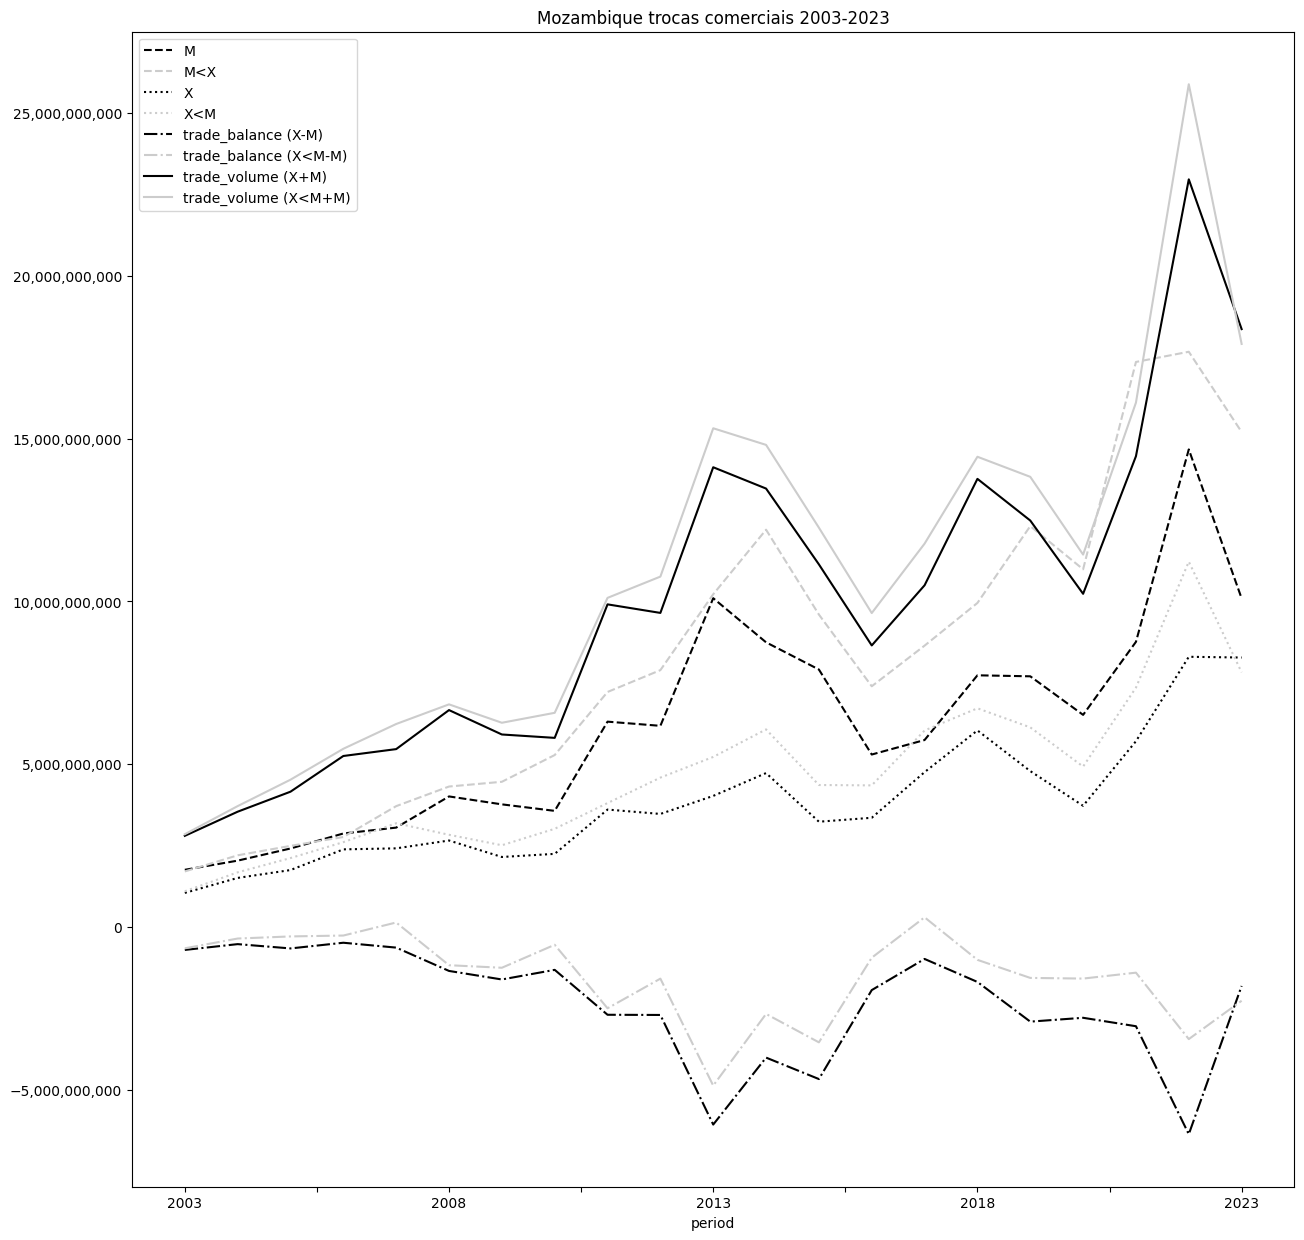

In [12]:
import logging

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
logging.basicConfig(level=logging.ERROR)

plotfile = f"reports/{country_of_interest_name}_1.2_trade_balance_{start_year}-{end_year}.png"

start_year=global_trade.index.min()
end_year=global_trade.index.max()
title=f"{country_of_interest_name} trocas comerciais {start_year}-{end_year}"
print("Plot saved to ", plotfile)
fig = global_trade[cols_of_interest].plot.line(figsize=(15,15),title=title)

# use a grayscale palette of colors
colors = ['0.0','0.8','0.0','0.8','0.0','0.8','0.0','0.8']

# use different line styles and black lines
linestyles = ['dashed', 'dashed', 'dotted', 'dotted', 'dashdot', 'dashdot', 'solid', 'solid']
for i, line in enumerate(fig.get_lines()):
    print(i, line, colors[i])
    line.set_color(colors[i])
    line.set_linestyle(linestyles[i % len(linestyles)])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig.yaxis.set_major_formatter(formatter)
fig.legend(list(global_trade.columns.astype(str)))

plt.savefig(plotfile)
plt.show()

## 2. Exports


### 2.1 Main export partners/clients

Colect destinations of exports of the country. 

Use either reported exports
of country of interest, or reported imports from country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [13]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'


In [14]:

# years_of_interest = comtrade.year_range(2020, 2021)
df = comtradetools.getFinalData(APIKEY,
                                reporterCode=reporterCode,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode=flowCode,
                                period=years_of_interest,
                                period_size=1,
                                partnerCode=partnerCode,
                                remove_world=True,
                                partner2Code=0,  # world
                                clCode="HS",
                                cmdCode="TOTAL",
                                motCode=0,  # all means of transport
                                customsCode='C00', # all customs
                                includeDesc=True,
                                cache=True
                                )

/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)


Compute percentage o trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [15]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5

# aggregate by year, flow, reporter
exports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','cmdCode','partner_sum','partner_perc','partner_upper_sum']

formats =  comtradetools.make_format(cols)

top_export_partners = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_export_partners_codes = exports[exports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} export partners of {country_of_interest_name} in {years_of_interest}: \n{top_export_partners}")
exports[exports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).style.format(formats)

Top 5 export partners of Mozambique in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Malawi' 'Portugal' 'South Africa' 'Spain' 'Areas, nes' 'Netherlands'
 'Zimbabwe' 'Switzerland' 'China' 'Iran' 'United Kingdom' 'India' 'USA'
 'Singapore' 'Italy' 'Rep. of Korea']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,cmdCode,partner_sum,partner_perc,partner_upper_sum
87,2003,X,Mozambique,1,"Areas, nes",TOTAL,"$634,711,994",60.801%,"$1,043,912,538"
70,2003,X,Mozambique,2,South Africa,TOTAL,"$169,636,392",16.250%,"$1,043,912,538"
72,2003,X,Mozambique,3,Spain,TOTAL,"$41,602,863",3.985%,"$1,043,912,538"
60,2003,X,Mozambique,4,Portugal,TOTAL,"$38,909,683",3.727%,"$1,043,912,538"
44,2003,X,Mozambique,5,Malawi,TOTAL,"$32,836,908",3.146%,"$1,043,912,538"
135,2004,X,Mozambique,1,Netherlands,TOTAL,"$916,534,971",60.949%,"$1,503,766,850"
157,2004,X,Mozambique,2,South Africa,TOTAL,"$211,429,991",14.060%,"$1,503,766,850"
177,2004,X,Mozambique,3,"Areas, nes",TOTAL,"$57,580,818",3.829%,"$1,503,766,850"
128,2004,X,Mozambique,4,Malawi,TOTAL,"$49,528,774",3.294%,"$1,503,766,850"
146,2004,X,Mozambique,5,Portugal,TOTAL,"$46,960,614",3.123%,"$1,503,766,850"


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [16]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0)

partner_perc                                                \
partnerDesc       Afghanistan Albania Algeria American Samoa Andorra Angola   
refYear flowDesc                                                              
2003    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2004    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2005    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2006    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2007    Export           0.00    0.00    0.00           0.00    0.00   0.01   
2008    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2009    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2010    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2011    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2012    Export           0.00    0.00    0.00           0.00    0.00   0.01   
2013    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2014    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2015    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2016    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2017    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2018    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2019    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2020    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2021    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2022    Export           0.00    0.00    0.00           0.00    0.00   0.00   
2023    Export           0.00    0.00    0.00           0.00    0.00   0.00   

                                                                    ...  \
partnerDesc      Anguilla Antigua and Barbuda Areas, nes Argentina  ...   
refYear flowDesc                                                    ...   
2003    Export       0.00                0.00       0.61      0.00  ...   
2004    Export       0.00                0.00       0.04      0.00  ...   
2005    Export       0.00                0.00       0.06      0.00  ...   
2006    Export       0.00                0.00       0.64      0.00  ...   
2007    Export       0.00                0.00       0.66      0.00  ...   
2008    Export       0.00                0.00       0.12      0.00  ...   
2009    Export       0.00                0.00       0.04      0.00  ...   
2010    Export       0.00                0.00       0.01      0.00  ...   
2011    Export       0.00                0.00       0.00      0.00  ...   
2012    Export       0.00                0.00       0.00      0.00  ...   
2013    Export       0.00                0.00       0.00      0.00  ...   
2014    Export       0.00                0.00       0.00      0.00  ...   
2015    Export       0.00                0.00       0.00      0.00  ...   
2016    Export       0.00                0.00       0.00      0.00  ...   
2017    Export       0.00                0.00       0.00      0.00  ...   
2018    Export       0.00                0.00       0.00      0.00  ...   
2019    Export       0.00                0.00       0.00      0.00  ...   
2020    Export       0.00                0.00       0.00      0.00  ...   
2021    Export       0.00                0.00       0.00      0.00  ...   
2022    Export       0.00                0.00       0.00      0.00  ...   
2023    Export       0.00                0.00       0.00      0.00  ...   

                                         primaryValue                          \
partnerDesc      United States Minor Outlying Islands      Uruguay Uzbekistan   
refYear flowDesc                                                                
2003    Export                              39,137.00         0.00       0.0

Limit table to top_export_partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [17]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]
pivoted[show_only_columns]

partner_perc                                            \
partnerDesc        Areas, nes China India Iran Italy Malawi Netherlands   
refYear flowDesc                                                          
2003    Export           0.61  0.01  0.00 0.00  0.00   0.03        0.00   
2004    Export           0.04  0.01  0.02  NaN  0.00   0.03        0.61   
2005    Export           0.06  0.02  0.02  NaN  0.00   0.03        0.60   
2006    Export           0.64  0.01  0.01  NaN  0.00   0.01        0.01   
2007    Export           0.66  0.02  0.01 0.00  0.00   0.01        0.00   
2008    Export           0.12  0.02  0.01  NaN  0.00   0.02        0.56   
2009    Export           0.04  0.03  0.03  NaN  0.01   0.02        0.42   
2010    Export           0.01  0.04  0.01 0.00  0.00   0.01        0.53   
2011    Export            NaN  0.05  0.02 0.04  0.01   0.01        0.39   
2012    Export           0.00  0.18  0.04 0.00  0.03   0.01        0.27   
2013    Export           0.00  0.03  0.17  NaN  0.01   0.01        0.29   
2014    Export            NaN  0.04  0.08 0.00  0.02   0.01        0.24   
2015    Export            NaN  0.03  0.10 0.00  0.03   0.00        0.29   
2016    Export            NaN  0.04  0.20 0.00  0.01   0.01        0.21   
2017    Export           0.00  0.05  0.34 0.00  0.06   0.00        0.10   
2018    Export            NaN  0.04  0.23  NaN  0.02   0.00        0.10   
2019    Export            NaN  0.07  0.16  NaN  0.06   0.01        0.06   
2020    Export           0.00  0.07  0.11  NaN  0.06   0.01        0.06   
2021    Export           0.00  0.09  0.14  NaN  0.03   0.01        0.08   
2022    Export           0.00  0.05  0.21  NaN  0.02   0.01        0.04   
2023    Export           0.00  0.14  0.16  NaN  0.03   0.01        0.04   

                                                   ...     primaryValue  \
partnerDesc      Portugal Rep. of Korea Singapore  ...      Netherlands   
refYear flowDesc                                   ...                    
2003    Export       0.04          0.00      0.00  ...     1,192,495.00   
2004    Export       0.03           NaN      0.00  ...   916,534,971.00   
2005    Export       0.01          0.00      0.00  ... 1,042,900,074.00   
2006    Export       0.01          0.00      0.00  ...    20,840,100.00   
2007    Export       0.02          0.00      0.00  ...    10,453,979.00   
2008    Export       0.01          0.00      0.00  ... 1,476,381,111.00   
2009    Export       0.01          0.00      0.01  ...   893,933,251.00   
2010    Export       0.05          0.00      0.00  ... 1,181,947,785.00   
2011    Export       0.01          0.00      0.00  ... 1,402,144,000.00   
2012    Export       0.00          0.00      0.01  ...   921,432,365.00   
2013    Export       0.03          0.00      0.01  ... 1,150,608,451.00   
2014    Export       0.01          0.00      0.10  ... 1,111,383,795.00   
2015    Export       0.01          0.01      0.05  ...   952,365,112.19   
2016    Export       0.01          0.00      0.04  ...   701,641,339.26   
2017    Export       0.00          0.00      0.03  ...   473,495,797.74   
2018    Export       0.05          0.02      0.04  ...   613,574,614.47   
2019    Export       0.01          0.03      0.04  ...   296,165,148.30   
2020    Export       0.02          0.02      0.03  ...   206,042,455.74   
2021    Export       0.01          0.04      0.07  ...   458,215,973.88   
2022    Export       0.00          0.06      0.04  ...   314,052,897.53   
2023    Export       0.00          0.06      0.05  ...   304,755,000.00   

                                                               \
partnerDesc            Portugal  Rep. of Korea      Singapore   
refYear flowDesc                                                
2003    Export    38,909,683.00       3,988.00     500,787.00   
2004    Export    46,960,614.00            NaN   2,191,307.00   
2005    Export    21,903,230.00     143,547.00   2,446,792.00   
2006    Export    29,738,

Make a table with the total value of exports for top partners in the period of interest

In [18]:
print("Top partners for exports: ",top_export_partners)
print("Period of interest:",years_of_interest)

Top partners for exports:  ['Malawi' 'Portugal' 'South Africa' 'Spain' 'Areas, nes' 'Netherlands'
 'Zimbabwe' 'Switzerland' 'China' 'Iran' 'United Kingdom' 'India' 'USA'
 'Singapore' 'Italy' 'Rep. of Korea']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [19]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_export_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,South Africa,Netherlands,India,"Areas, nes",China,United Kingdom,Singapore,Italy,Zimbabwe,Rep. of Korea,Spain,USA,Portugal,Switzerland,Malawi,Iran
refYear,,,,,,,,,,,,,,,,
2003,"169,636,392.00","1,192,495.00","3,608,914.00","634,711,994.00","5,412,123.00","2,223,599.00","500,787.00","1,721,331.00","29,467,994.00","3,988.00","41,602,863.00","15,881,724.00","38,909,683.00","613,250.00","32,836,908.00","45,329.00"
2004,"211,429,991.00","916,534,971.00","32,954,412.00","57,580,818.00","21,390,760.00","2,615,730.00","2,191,307.00","784,289.00","33,393,334.00",NaN,"37,936,038.00","10,654,763.00","46,960,614.00","1,451,043.00","49,528,774.00",NaN
2005,"280,369,236.00","1,042,900,074.00","26,582,413.00","109,825,033.00","34,130,204.00","8,165,169.00","2,446,792.00","1,738,594.00","45,977,266.00","143,547.00","32,887,469.00","17,760,518.00","21,903,230.00","3,123,094.00","49,385,039.00",NaN
2006,"361,707,189.00","20,840,100.00","30,197,013.00","1,522,607,543.00","32,939,441.00","16,308,947.00","3,493,732.00","3,161,908.00","76,128,166.00","367,438.00","43,495,362.00","6,515,429.00","29,738,125.00","52,635,930.00","24,738,387.00",NaN
2007,"429,339,068.00","10,453,979.00","15,915,095.00","1,584,053,214.00","44,040,728.00","24,685,073.00","1,292,419.00","1,494,538.00","73,328,576.00","1,603,422.00","33,837,122.00","2,239,061.00","39,937,682.00","6,932,255.00","17,425,987.00","114,768.00"
2008,"265,540,514.00","1,476,381,111.00","28,401,005.00","321,160,028.00","51,604,163.00","10,239,824.00","1,886,239.00","6,892,973.00","81,346,658.00","886,058.00","51,047,849.00","18,166,628.00","26,412,548.00","14,330,442.00","46,767,848.00",NaN
2009,"460,308,742.00","893,933,251.00","56,511,897.00","88,437,089.00","74,477,597.00","28,721,850.00","28,376,760.00","15,677,751.00","73,797,826.00","395,812.00","31,442,818.00","41,431,353.00","32,189,271.00","9,588,957.00","46,708,698.00",NaN
2010,"467,224,448.00","1,181,947,785.00","30,434,646.00","19,378,003.00","79,567,735.00","1,363,265.00","10,986,244.00","301,584.00","72,069,109.00","4,462,545.00","30,602,490.00","16,428,794.00","108,344,256.00","7,831,735.00","26,969,616.00","4,759,642.00"
2011,"583,952,000.00","1,402,144,000.00","87,226,000.00",NaN,"167,692,000.00","198,723,000.00","9,616,000.00","51,613,000.00","127,273,000.00","140,000.00","83,364,000.00","25,672,000.00","42,679,000.00","99,812,000.00","46,469,000.00","151,722,000.00"


Plot saved to  reports/Mozambique_2.1.4_export_partners_2003-2023.png
0 Line2D(_child0) #555555
1 Line2D(_child2) #666666
2 Line2D(_child4) #777777
3 Line2D(_child6) #888888
4 Line2D(_child8) #999999
5 Line2D(_child10) #AAAAAA
6 Line2D(_child12) #BBBBBB
7 Line2D(_child14) #CCCCCC
8 Line2D(_child16) #555555
9 Line2D(_child18) #666666
10 Line2D(_child20) #777777
11 Line2D(_child22) #888888
12 Line2D(_child24) #999999
13 Line2D(_child26) #AAAAAA
14 Line2D(_child28) #BBBBBB
15 Line2D(_child30) #CCCCCC


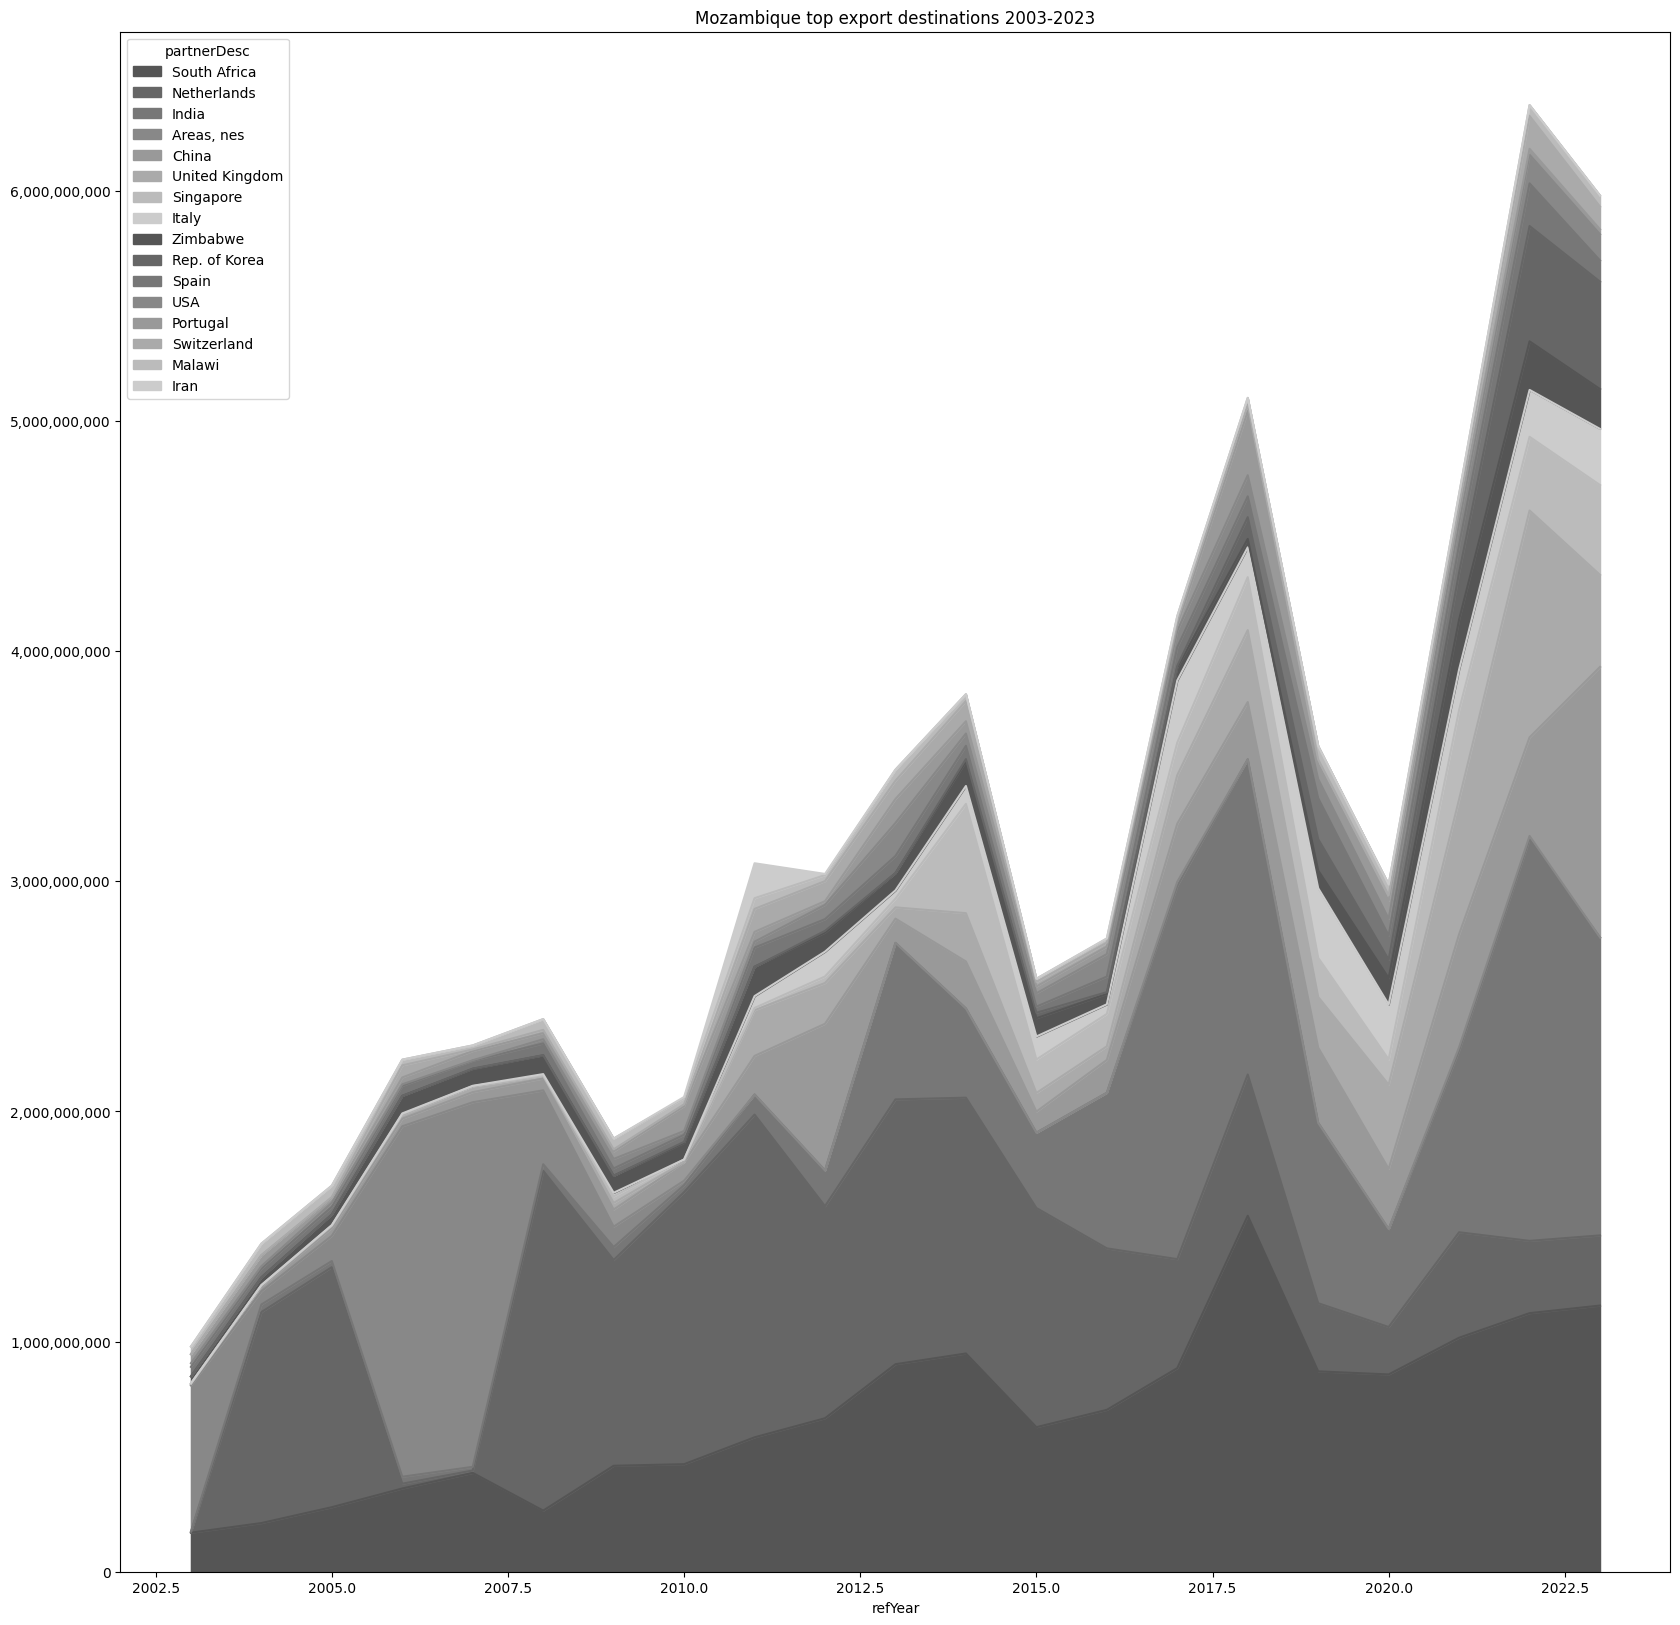

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plotfile = f"reports/{country_of_interest_name}_2.1.4_export_partners_{start_year}-{end_year}.png"
start_year=values_only.index.min()
end_year=values_only.index.max()
title=f"{country_of_interest_name} top export destinations {start_year}-{end_year}"
print("Plot saved to ", plotfile)
# see https://matplotlib.org/stable/gallery/color/named_colors.html
# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', ]

fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)
for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [21]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_export_partners]

#### Export to Excel

Table with the top export destinations for the period of interest

In [22]:
top_partners_file = f'reports/{country_of_interest_name}_2.1.1_top_export_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_2.1.2_top_export_partners_cols.xlsx'
export_top_partners_file = f'reports/{country_of_interest_name}_2.1.3_export_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

exports[cols].sort_values(['refYear','flowCode','partner_rank',f'{partner_column}Desc','cmdCode']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].to_excel(export_top_partners_file)

print(f"Top partners file: {top_partners_file}")
print(f"Top partners cols file: {top_partners_cols_file}")
print(f"Export top partners file: {export_top_partners_file}")

Top partners file: reports/Mozambique_2.1.1_top_export_partners.xlsx
Top partners cols file: reports/Mozambique_2.1.2_top_export_partners_cols.xlsx
Export top partners file: reports/Mozambique_2.1.3_export_top_5_partners_2003-2023.xlsx


### 2.2 Exports: products

#### What are the main exported products

In [23]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)

Mozambique 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products exported by country of interest

In [24]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [25]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World Bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

In [26]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [27]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,68,BOL,Bolivia (Plurinational State of),M,...,11.22,True,76.00,False,421.00,100.00,421.00,4,False,True
1,C,A,20030101,2003,52,2003,56,BEL,Belgium,M,...,"1,638.00",False,NaN,False,"35,556.00",NaN,"35,556.00",0,True,False
2,C,A,20030101,2003,52,2003,56,BEL,Belgium,M,...,"127,074.00",False,NaN,False,"1,240,615.00",NaN,"1,240,615.00",0,True,False
3,C,A,20030101,2003,52,2003,72,BWA,Botswana,M,...,624.00,False,NaN,False,"2,303.00",NaN,"2,303.00",0,False,False
4,C,A,20030101,2003,52,2003,56,BEL,Belgium,M,...,"2,174.00",False,NaN,False,"10,112.00",NaN,"10,112.00",0,True,False


Agreggate by product, keep the top products exported each year

In [28]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
exports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
exports = exports[exports['product_rank']<=show_only_top]
exports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_export_products_codes = exports['cmdCode'].unique()

print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
exports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 2 to 73486
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2Code 

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,product_upper_sum
47,2003,M,1,760110,"Aluminium; unwrought, (not alloyed)","$586,214,981",53.701%,"$1,091,624,307"
2,2003,M,2,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)","$83,417,826",7.642%,"$1,091,624,307"
165,2003,M,3,760120,"Aluminium; unwrought, alloys","$65,738,578",6.022%,"$1,091,624,307"
24,2003,M,4,271600,Electrical energy,"$41,191,515",3.773%,"$1,091,624,307"
15,2003,M,5,240120,Tobacco; partly or wholly stemmed or stripped,"$40,427,337",3.703%,"$1,091,624,307"
2098,2004,M,1,760110,"Aluminium; unwrought, (not alloyed)","$987,894,622",59.000%,"$1,674,407,487"
2100,2004,M,2,760120,"Aluminium; unwrought, alloys","$93,402,942",5.578%,"$1,674,407,487"
2490,2004,M,3,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$89,511,811",5.346%,"$1,674,407,487"
2031,2004,M,4,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)","$78,143,560",4.667%,"$1,674,407,487"
2045,2004,M,5,240120,Tobacco; partly or wholly stemmed or stripped,"$44,775,709",2.674%,"$1,674,407,487"


#### Export to Excel

In [29]:
filename = f'reports/{country_of_interest_name}_2.2_exports_products_{clCode}-{cmdDetail}-{exports["refYear"].min()}-{exports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
exports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Mozambique_2.2_exports_products_HS-AG6-2003-2023.xlsx


### 2.3 Export partners / products analysis

Which are the partners buying the top exports of country of interest?


In [30]:

# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = True  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'M'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'X'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [31]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=True,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76799 entries, 0 to 76798
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  76799 non-null  object 
 1   freqCode                  76799 non-null  object 
 2   refPeriodId               76799 non-null  int64  
 3   refYear                   76799 non-null  int64  
 4   refMonth                  76799 non-null  int64  
 5   period                    76799 non-null  object 
 6   reporterCode              76799 non-null  int64  
 7   reporterISO               76799 non-null  object 
 8   reporterDesc              76799 non-null  object 
 9   flowCode                  76799 non-null  object 
 10  flowDesc                  76799 non-null  object 
 11  partnerCode               76799 non-null  int64  
 12  partnerISO                76799 non-null  object 
 13  partnerDesc               76799 non-null  object 
 14  partne

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76799 entries, 0 to 76798
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  76799 non-null  object 
 1   freqCode                  76799 non-null  object 
 2   refPeriodId               76799 non-null  int64  
 3   refYear                   76799 non-null  int64  
 4   refMonth                  76799 non-null  int64  
 5   period                    76799 non-null  object 
 6   reporterCode              76799 non-null  int64  
 7   reporterISO               76799 non-null  object 
 8   reporterDesc              76799 non-null  object 
 9   flowCode                  76799 non-null  object 
 10  flowDesc                  76799 non-null  object 
 11  partnerCode               76799 non-null  int64  
 12  partnerISO                76799 non-null  object 
 13  partnerDesc               76799 non-null  object 
 14  partne

In [33]:
cols=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
23668,2011,M,Zambia,Mozambique,836.68,841311,Pumps; fitted or designed to be fitted with a ...
2032,2004,M,Belgium,Mozambique,"32,229.00",030614,"Crustaceans; crabs, frozen (whether in shell o..."
2158,2004,M,Bolivia (Plurinational State of),Mozambique,"3,975.00",940360,"Furniture; wooden, other than for office, kitc..."
9403,2007,M,Croatia,Mozambique,619.00,610510,"Shirts; men's or boys', of cotton, knitted or ..."
66709,2021,M,Zimbabwe,Mozambique,"112,442.71",670490,"Wigs, false beards, eyebrows and eyelashes, sw..."
33813,2014,M,India,Mozambique,"25,435.00",380210,Carbon; activated
38384,2015,M,Zimbabwe,Mozambique,"1,846,826.96",310520,"Fertilizers, mineral or chemical; containing t..."
70341,2022,M,Malawi,Mozambique,771.89,870421,Vehicles; compression-ignition internal combus...
44528,2016,M,Eswatini,Mozambique,19.63,620459,"Skirts and divided skirts; women's or girls', ..."
48173,2017,M,Zimbabwe,Mozambique,88.19,670420,"Wigs, false beards, eyebrows and eyelashes, sw..."


In [34]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [35]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
print(f"Top products exported by {country_of_interest_name} in {years_of_interest}:\n {top_export_products_codes}")
for cmdCode in top_export_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)

cols=['refYear',f'{reporter_column}Desc','flowCode','cmdCode','cmdDesc',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)
products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_export_products_codes)
                       & (products_and_partners[f'{prefix}_rank']<=show_only_top))]


Top products exported by Mozambique in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['030613' '240120' '271600' '760110' '760120' '271011' '271019' '271111'
 '999999' '440399' '271012' '270112' '270900' '710399' '270119' '440349'
 '261400' '710812']
   030613: 030613
   240120: Tobacco; partly or wholly stemmed or stripped
   271600: Electrical energy
   760110: Aluminium; unwrought, (not alloyed)
   760120: Aluminium; unwrought, alloys
   271011: 271011
   271019: Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations
   271111: Petroleum gases and other gaseous hydrocarbons; liquefied, natural gas
   999999: Commodities not specified according to kind
   440399: Wood; in the rough, whether or not stripped of bark or sapwood, or roughly squar

#### Show partners for main export products

In [36]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True])\
                                             .head(10).style.format(formats) #.hide(axis='index')

,refYear,partnerDesc,flowCode,cmdCode,cmdDesc,reporterDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
48,2003,Mozambique,M,760110,"Aluminium; unwrought, (not alloyed)",Belgium,1,"$305,770,125",52.160%,"$586,214,981"
501,2003,Mozambique,M,760110,"Aluminium; unwrought, (not alloyed)",Italy,2,"$100,811,301",17.197%,"$586,214,981"
1795,2003,Mozambique,M,760110,"Aluminium; unwrought, (not alloyed)",Spain,3,"$58,813,657",10.033%,"$586,214,981"
1938,2003,Mozambique,M,760110,"Aluminium; unwrought, (not alloyed)",United Kingdom,4,"$45,519,721",7.765%,"$586,214,981"
244,2003,Mozambique,M,760110,"Aluminium; unwrought, (not alloyed)",Germany,5,"$44,609,000",7.610%,"$586,214,981"
1782,2003,Mozambique,M,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",Spain,1,"$41,733,445",50.029%,"$83,417,826"
676,2003,Mozambique,M,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",Portugal,2,"$20,069,560",24.059%,"$83,417,826"
287,2003,Mozambique,M,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",Japan,3,"$9,887,967",11.854%,"$83,417,826"
922,2003,Mozambique,M,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",South Africa,4,"$5,706,535",6.841%,"$83,417,826"
146,2003,Mozambique,M,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",France,5,"$2,740,344",3.285%,"$83,417,826"


#### Export to Excel

In [37]:
filename = f'reports/{country_of_interest_name}_2.3_exports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                             ascending=[True,True,False,True]).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Mozambique_2.3_exports_products_partners_HS-AG6-2003-2023.xlsx


### 2.4 Main clients and products exported 

Detail of the main products by export partner.

Allows to analyse the mix of products of the main export partners from this country

In [38]:
top_export_partners

array(['Malawi', 'Portugal', 'South Africa', 'Spain', 'Areas, nes',
       'Netherlands', 'Zimbabwe', 'Switzerland', 'China', 'Iran',
       'United Kingdom', 'India', 'USA', 'Singapore', 'Italy',
       'Rep. of Korea'], dtype=object)

In [39]:
import comtradetools

show_only_top = 5

print(f"Top export partners ({len(top_export_partners)}): {top_export_partners}")
prefix='partner_cmd'
partners_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear',f'{reporter_column}Desc','flowCode',f'{partner_column}Desc','cmdCode','cmdDesc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
partners_and_products=partners_and_products[(partners_and_products[f'{partner_column}Desc'].isin(top_export_partners)
                       & (partners_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top export partners (16): ['Malawi' 'Portugal' 'South Africa' 'Spain' 'Areas, nes' 'Netherlands'
 'Zimbabwe' 'Switzerland' 'China' 'Iran' 'United Kingdom' 'India' 'USA'
 'Singapore' 'Italy' 'Rep. of Korea']
First rows


refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,Mozambique,M,Italy,760110,"Aluminium; unwrought, (not alloyed)",1,"$100,811,301",90.054%,"$111,944,877"
2003,Mozambique,M,Italy,251611,Granite; crude or roughly trimmed,2,"$6,048,028",5.403%,"$111,944,877"
2003,Mozambique,M,Italy,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",3,"$1,410,695",1.260%,"$111,944,877"
2003,Mozambique,M,Italy,440799,"Wood; sawn or chipped lengthwise, sliced or peeled, whether or not planed, sanded or end-jointed, thicker than 6mm, n.e.c. in heading no. 4407",4,"$1,111,713",0.993%,"$111,944,877"
2003,Mozambique,M,Italy,270112,"Coal; bituminous, whether or not pulverised, but not agglomerated",5,"$1,087,077",0.971%,"$111,944,877"
2003,Mozambique,M,Spain,760110,"Aluminium; unwrought, (not alloyed)",1,"$58,813,657",53.851%,"$109,214,610"
2003,Mozambique,M,Spain,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",2,"$41,733,445",38.212%,"$109,214,610"
2003,Mozambique,M,Spain,760120,"Aluminium; unwrought, alloys",3,"$7,283,130",6.669%,"$109,214,610"
2003,Mozambique,M,Spain,251611,Granite; crude or roughly trimmed,4,"$541,245",0.496%,"$109,214,610"
2003,Mozambique,M,Spain,170111,"Sugars; cane sugar, raw, in solid form, not containing added flavouring or colouring matter",5,"$333,857",0.306%,"$109,214,610"


Last rows

In [40]:
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,partnerDesc,flowCode,reporterDesc,cmdCode,cmdDesc,partner_cmd_rank,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,Mozambique,M,Portugal,440398,"Wood; of eucalyptus (Eucalyptus spp.), in the rough, whether or not stripped of bark or sapwood, or roughly squared, untreated",1,"$10,981,636",28.812%,"$38,114,319"
2023,Mozambique,M,Portugal,030617,"Crustaceans; frozen, shrimps and prawns, excluding cold-water varieties, in shell or not, smoked, cooked or not before or during smoking; in shell, cooked by steaming or by boiling in water",2,"$10,561,260",27.709%,"$38,114,319"
2023,Mozambique,M,Portugal,170114,"Sugars; cane sugar, raw, in solid form, other than as specified in Subheading Note 2 to this chapter, not containing added flavouring or colouring matter",3,"$3,258,445",8.549%,"$38,114,319"
2023,Mozambique,M,Portugal,240120,Tobacco; partly or wholly stemmed or stripped,4,"$2,035,144",5.340%,"$38,114,319"
2023,Mozambique,M,Portugal,030611,"Crustaceans; frozen, rock lobsters and other sea crawfish (Palinurus spp., Panulirus spp., Jasus spp.), in shell or not, smoked, cooked or not before or during smoking; in shell, cooked by steaming or by boiling in water",5,"$1,820,815",4.777%,"$38,114,319"
2023,Mozambique,M,United Kingdom,270111,"Coal; anthracite, whether or not pulverised, but not agglomerated",1,"$11,305,161",35.107%,"$32,201,770"
2023,Mozambique,M,United Kingdom,170310,"Sugars; molasses, from sugar cane, resulting from the extraction or refining of sugar",2,"$9,328,590",28.969%,"$32,201,770"
2023,Mozambique,M,United Kingdom,710399,"Stones; precious (other than diamonds) and semi-precious stones, (other than rubies, sapphires and emeralds), worked other than simply sawn or roughly shaped, not strung, mounted or set",3,"$2,376,042",7.379%,"$32,201,770"
2023,Mozambique,M,United Kingdom,710391,"Stones; rubies, sapphires and emeralds, worked (other than simply sawn or roughly shaped), not strung, mounted or set",4,"$2,282,125",7.087%,"$32,201,770"
2023,Mozambique,M,United Kingdom,080440,"Fruit, edible; avocados, fresh or dried",5,"$2,185,811",6.788%,"$32,201,770"


In [41]:
filename = f'reports/{country_of_interest_name}_2.4_exports_partners_products_{clCode}-{cmdDetail}-{partners_and_products["refYear"].min()}-{partners_and_products["refYear"].max()}.xlsx'
partners_and_products[partners_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False])[cols].to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Mozambique_2.4_exports_partners_products_HS-AG6-2003-2023.xlsx


### 2.5 Alternative suppliers of costumers of country of interest




For each year, partner, exported commodity, fetches all the imports of
the commodity by partner from other countries, and computes the ranking
of country of interest among the suppliers of partner for that commodity,
e.g.

Country of interest：Angola, in 2021, China, exported commodity code 270900 "Oils; petroleum oils and oils obtained 
from bituminous minerals, crude" ; fetch all suppliers of 270900 of China and compute
the ranking of Angola.


First step is to get the combos of partner and commodity

In [42]:
combos_of_interest = partners_and_products[(partners_and_products['cmdCode'].isin(top_export_products_codes)
                & (partners_and_products[f'{partner_column}Code'].isin(top_export_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

86

In [43]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get all the suppliers of client for products exported by contry of interest.

In [44]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='M',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  454,710,842,620,716,826,528,156,724,757,410,699,380,702
cmdCodeCSV:  999999,760110,271019,270900,240120,271011,271111,760120,271600,710399,440399,270119,270112,440349,271012,030613,261400,710812


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51263), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51268), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.10

Alternative, concatenating

In [45]:
import pandas as pd

try_alternative = False

if try_alternative:
    df2: pd.DataFrame = None
    for countryCode,cmdCode in combos_of_interest:
        print(countryCode,cmdCode)
        tmp = comtradetools.getFinalData(APIKEY,
                                        reporterCode=countryCode,
                                        typeCode='C',  # commodities
                                        freqCode='A',  # annual
                                        flowCode='M',
                                        partnerCode=None,
                                        remove_world=True,
                                        partner2Code=0,
                                        period=years_of_interest,
                                        period_size=1,
                                        clCode='HS',
                                        cmdCode=cmdCode,  # Top level product types
                                        customsCode='C00',
                                        motCode=0,  # all means of transport
                                        )
        if df2 is None:
            df2 = tmp
        else:
            df2 = pd.concat([df2,tmp],axis=0)


Partners buying top products of country of interest.

In [46]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['China',
  'Rep. of Korea',
  'Italy',
  'Malawi',
  'Portugal',
  'Netherlands',
  'South Africa',
  'Singapore',
  'India',
  'Zimbabwe',
  'Spain',
  'Switzerland',
  'United Kingdom',
  'USA'],
 ['Türkiye',
  'Israel',
  'Norway',
  'Viet Nam',
  'Mexico',
  'Russian Federation',
  'South Africa',
  'New Zealand',
  'Philippines',
  'Finland',
  'Brazil',
  'Denmark',
  'Austria',
  'Sweden',
  'India',
  'Indonesia',
  'Spain',
  'Belgium',
  'Switzerland',
  'Malaysia',
  'Netherlands',
  'Thailand',
  'Canada',
  'Australia',
  'Singapore',
  'Italy',
  'United Kingdom',
  'China',
  'France',
  'China, Hong Kong SAR',
  'Germany',
  'Rep. of Korea',
  'Other Asia, nes',
  'USA',
  'Japan',
  'Pakistan',
  'Belarus',
  'Greece',
  'Iran',
  'Ukraine',
  'Myanmar',
  'Sri Lanka',
  'Czechia',
  "Dem. People's Rep. of Korea",
  'Kyrgyzstan',
  'Argentina',
  'Solomon Isds',
  'Cameroon',
  'Central African Rep.',
  'Chile',
  'Congo',
  'Dem. Rep. of the Congo',
  'Costa Rica',


For each partner show the top supliers of the products bought from country of interest. 

If country of interest is not in the top five, show position anyway if it is a supplier in the given year 

In [47]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_suppliers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_suppliers = other_suppliers[other_suppliers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','flowCode','refYear','cmdCode','cmdDesc','cmd_partner_rank','partnerDesc','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_suppliers[(other_suppliers['partnerCode'] == country_of_interest)
                | (other_suppliers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
China,M,2003,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",1,Canada,"$38,795,543",31.822%,"$121,915,167"
China,M,2003,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",2,India,"$19,219,592",15.765%,"$121,915,167"
China,M,2003,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",3,Greenland,"$17,835,081",14.629%,"$121,915,167"
China,M,2003,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",4,Denmark,"$10,974,663",9.002%,"$121,915,167"
China,M,2003,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",5,Indonesia,"$6,851,768",5.620%,"$121,915,167"
China,M,2003,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",39,Mozambique,"$5,457",0.004%,"$121,915,167"
China,M,2004,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",1,Canada,"$41,608,714",33.206%,"$125,305,152"
China,M,2004,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",2,India,"$17,211,219",13.735%,"$125,305,152"
China,M,2004,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",3,Greenland,"$13,851,576",11.054%,"$125,305,152"
China,M,2004,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)",4,Denmark,"$8,909,521",7.110%,"$125,305,152"


### Ranking of country of interest in the supliers of main export products

Allows assessment of the importance of country of interest for the partners
that are buying its main exports.

In [48]:
ignore_if_rank_is_higher = 25

relevant_for_partner_imports=other_suppliers[
    (other_suppliers['partnerCode'
                     ] == country_of_interest) &
    (other_suppliers['cmd_partner_rank'] < ignore_if_rank_is_higher)

                     ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_imports.head(50).style.format(formats).hide(axis='index')

reporterDesc,flowCode,refYear,cmdCode,cmdDesc,cmd_partner_rank,partnerDesc,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
China,M,2008,261400,Titanium ores and concentrates,13,Mozambique,"$345,927",0.191%,"$180,702,596"
China,M,2009,261400,Titanium ores and concentrates,7,Mozambique,"$2,218,138",1.365%,"$162,459,161"
China,M,2010,261400,Titanium ores and concentrates,4,Mozambique,"$15,665,158",6.099%,"$256,865,731"
China,M,2011,261400,Titanium ores and concentrates,4,Mozambique,"$26,866,676",4.890%,"$549,455,455"
China,M,2012,261400,Titanium ores and concentrates,4,Mozambique,"$43,572,009",4.343%,"$1,003,208,592"
China,M,2013,261400,Titanium ores and concentrates,4,Mozambique,"$35,946,298",5.592%,"$642,834,481"
China,M,2014,261400,Titanium ores and concentrates,3,Mozambique,"$49,505,928",11.850%,"$417,763,010"
China,M,2015,261400,Titanium ores and concentrates,5,Mozambique,"$17,968,534",6.562%,"$273,839,815"
China,M,2016,261400,Titanium ores and concentrates,3,Mozambique,"$42,826,513",14.475%,"$295,859,076"
China,M,2017,261400,Titanium ores and concentrates,2,Mozambique,"$93,674,455",16.985%,"$551,522,810"


In [49]:
filename = f'reports/{country_of_interest_name}_2.5.1_export_partners_alternative.xlsx'
print("Exporting to ",filename)
other_suppliers[cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename)

Exporting to  reports/Mozambique_2.5.1_export_partners_alternative.xlsx


In [50]:
filename = f'reports/{country_of_interest_name}_2.5.2_export_partners_alternative_relevant.xlsx'
print("Exporting to ",filename)
relevant_for_partner_imports.to_excel(filename)

Exporting to  reports/Mozambique_2.5.2_export_partners_alternative_relevant.xlsx


## 3. Imports

In [51]:
print(country_of_interest_name, years_of_interest)

Mozambique 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


### 3.1 Main import partners

Collect imports to country of interest.

Use either reported imports by country of interest, 
or reported exports to country of interest by
all other countries (symmetric reporting). 

Set variable `symmetric_reporting` to choose.

In [52]:
# If symmetric_reporting is "True" we get the imports from
#    the reported exports of all the countries
# i.e. instead of asking Country of Interest for import data we ask the world
#    for export data towards Country of Interest

symmetric_reporting = False  # set to false to use reported imports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'



In [53]:
clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6, but some codes AG4
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,  # imports
                        partnerCode=partnerCode, # every body
                        remove_world=True,
                        partner2Code=0, # ignore parter2
                        period=years_of_interest,
                        period_size=1,
                        clCode="HS",
                        cmdCode="TOTAL",
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        cache=True
                        )

/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51329), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51332), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.10

Compute percentage of trade and rank of partners for each year.

Use `show_only_top` to show only the top partners (e.g. 5).

In [54]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
partner_column = 'partner'
reporter_column = 'reporter'

# aggregate by year, flow, reporter
imports = comtradetools.total_rank_perc(df,groupby=['refYear','flowCode',f'{partner_column}Desc'],
                                    col='primaryValue',
                                    prefix='partner',
                                    drop_duplicates=True)

cols=['refYear','flowCode',f'{reporter_column}Desc','partner_rank',f'{partner_column}Desc','partner_sum','partner_perc','partner_upper_perc']

formats =  comtradetools.make_format(cols)

top_import_partners = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Desc'].unique()
top_import_partners_codes = imports[imports['partner_rank']<=show_only_top][f'{partner_column}Code'].unique()

print(f"Top {show_only_top} import partners of {country_of_interest_name} in {years_of_interest}: \n{top_import_partners}")
imports[imports['partner_rank']<=show_only_top][cols].sort_values(['refYear','flowCode','partner_rank']).style.format(formats)

Top 5 import partners of Mozambique in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023: 
['Portugal' 'India' 'South Africa' 'USA' 'Areas, nes' 'Netherlands'
 'United Arab Emirates' 'Bahrain' 'China' 'United Kingdom' 'Singapore'
 'Rep. of Korea']


,refYear,flowCode,reporterDesc,partner_rank,partnerDesc,partner_sum,partner_perc,partner_upper_perc
105,2003,M,Mozambique,1,South Africa,"$587,719,950",33.527%,33.527%
129,2003,M,Mozambique,2,"Areas, nes","$544,601,274",31.067%,31.067%
100,2003,M,Mozambique,3,India,"$68,041,120",3.881%,3.881%
93,2003,M,Mozambique,4,Portugal,"$62,250,025",3.551%,3.551%
123,2003,M,Mozambique,5,USA,"$60,903,485",3.474%,3.474%
240,2004,M,Mozambique,1,South Africa,"$666,856,563",32.775%,32.775%
263,2004,M,Mozambique,2,"Areas, nes","$616,859,846",30.318%,30.318%
226,2004,M,Mozambique,3,Portugal,"$70,589,807",3.469%,3.469%
236,2004,M,Mozambique,4,India,"$63,715,738",3.132%,3.132%
258,2004,M,Mozambique,5,USA,"$48,433,610",2.380%,2.380%


Pivot the countries to columns, keeping the total value and percentage in separate columns.

----

Passamos os países para colunas, mantendo a percentagem e o valor em separado.

In [55]:
pivoted = df.pivot_table(index=['refYear','flowDesc'], columns=f'{partner_column}Desc', values=['primaryValue','partner_perc'])
pivoted.swaplevel(axis=1).fillna(0,inplace=True)
pivoted.sort_index(axis=1, level=0, inplace=True)
pivoted.fillna(0, inplace=True)
pivoted

partner_perc                                                \
partnerDesc       Afghanistan Albania Algeria American Samoa Andorra Angola   
refYear flowDesc                                                              
2003    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2004    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2005    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2006    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2007    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2008    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2009    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2010    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2011    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2012    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2013    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2014    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2015    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2016    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2017    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2018    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2019    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2020    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2021    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2022    Import           0.00    0.00    0.00           0.00    0.00   0.00   
2023    Import           0.00    0.00    0.00           0.00    0.00   0.00   

                                                                     ...  \
partnerDesc      Anguilla Antarctica Antigua and Barbuda Areas, nes  ...   
refYear flowDesc                                                     ...   
2003    Import       0.00       0.00                0.00       0.31  ...   
2004    Import       0.00       0.00                0.00       0.30  ...   
2005    Import       0.00       0.00                0.00       0.04  ...   
2006    Import       0.00       0.00                0.00       0.06  ...   
2007    Import       0.00       0.00                0.00       0.13  ...   
2008    Import       0.00       0.00                0.00       0.03  ...   
2009    Import       0.00       0.00                0.00       0.00  ...   
2010    Import       0.00       0.00                0.00       0.01  ...   
2011    Import       0.00       0.00                0.00       0.00  ...   
2012    Import       0.00       0.00                0.00       0.00  ...   
2013    Import       0.00       0.00                0.00       0.00  ...   
2014    Import       0.00       0.00                0.00       0.00  ...   
2015    Import       0.00       0.00                0.00       0.00  ...   
2016    Import       0.00       0.00                0.00       0.00  ...   
2017    Import       0.00       0.00                0.00       0.00  ...   
2018    Import       0.00       0.00                0.00       0.01  ...   
2019    Import       0.00       0.00                0.00       0.00  ...   
2020    Import       0.00       0.00                0.00       0.00  ...   
2021    Import       0.00       0.00                0.00       0.00  ...   
2022    Import       0.00       0.00                0.00       0.00  ...   
2023    Import       0.00       0.00                0.00       0.00  ...   

                  primaryValue                                                \
partnerDesc            Uruguay Uzbekistan   Vanuatu Venezuela       Viet Nam   
refYear flowDesc                                                               
2003    Import       14,287.00  19,209.00      0.00    

Limit table to top import partners

Note that the number of top partners considered was set before with `show_only_top` (e.g. 5).

But each year the top partners may vary, so that the total number of partners for the period will be
more than `show_only_top`.

In [56]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
pivoted[show_only_columns]

partner_perc                                           \
partnerDesc        Areas, nes Bahrain China India Netherlands Portugal   
refYear flowDesc                                                         
2003    Import           0.31    0.00  0.02  0.04        0.01     0.04   
2004    Import           0.30    0.00  0.02  0.03        0.01     0.03   
2005    Import           0.04    0.00  0.03  0.04        0.12     0.04   
2006    Import           0.06    0.02  0.03  0.05        0.13     0.03   
2007    Import           0.13    0.00  0.03  0.04        0.15     0.03   
2008    Import           0.03    0.07  0.04  0.04        0.17     0.03   
2009    Import           0.00    0.00  0.05  0.07        0.13     0.04   
2010    Import           0.01    0.03  0.04  0.06        0.18     0.04   
2011    Import           0.00    0.02  0.06  0.05        0.11     0.04   
2012    Import           0.00    0.06  0.06  0.03        0.09     0.05   
2013    Import           0.00    0.06  0.06  0.03        0.04     0.05   
2014    Import           0.00    0.09  0.08  0.04        0.07     0.05   
2015    Import           0.00    0.05  0.12  0.04        0.07     0.06   
2016    Import           0.00    0.00  0.08  0.06        0.02     0.06   
2017    Import           0.00    0.00  0.09  0.08        0.09     0.04   
2018    Import           0.01    0.01  0.12  0.07        0.07     0.03   
2019    Import           0.00    0.01  0.11  0.06        0.02     0.04   
2020    Import           0.00    0.00  0.11  0.09        0.01     0.04   
2021    Import           0.00    0.01  0.11  0.09        0.01     0.03   
2022    Import           0.00    0.01  0.07  0.06        0.00     0.02   
2023    Import           0.00    0.03  0.15  0.08        0.01     0.03   

                                                            ...  \
partnerDesc      Rep. of Korea Singapore South Africa  USA  ...   
refYear flowDesc                                            ...   
2003    Import            0.01      0.00         0.34 0.03  ...   
2004    Import            0.00      0.00         0.33 0.02  ...   
2005    Import            0.01      0.01         0.41 0.03  ...   
2006    Import            0.00      0.01         0.33 0.04  ...   
2007    Import            0.01      0.00         0.32 0.03  ...   
2008    Import            0.01      0.00         0.29 0.04  ...   
2009    Import            0.01      0.02         0.35 0.04  ...   
2010    Import            0.00      0.00         0.34 0.02  ...   
2011    Import            0.00      0.01         0.34 0.05  ...   
2012    Import            0.00      0.01         0.31 0.04  ...   
2013    Import            0.00      0.06         0.33 0.02  ...   
2014    Import            0.00      0.01         0.33 0.02  ...   
2015    Import            0.00      0.02         0.30 0.02  ...   
2016    Import            0.00      0.08         0.30 0.02  ...   
2017    Import            0.00      0.02         0.29 0.02  ...   
2018    Import            0.00      0.04         0.28 0.03  ...   
2019    Import            0.00      0.07         0.28 0.03  ...   
2020    Import            0.00      0.06         0.31 0.02  ...   
2021    Import            0.01      0.07         0.26 0.03  ...   
2022    Import            0.32      0.05         0.16 0.01  ...   
2023    Import            0.00      0.06         0.23 0.02  ...   

                     primaryValue                                \
partnerDesc                 China          India    Netherlands   
refYear flowDesc                                                  
2003    Import      40,625,460.00  68,041,120.00   9,214,112.00   
2004    Import      40,270,002.00  63,715,738.00  10,827,665.00   
2005    Import      68,288,924.00  96,724,302.00 300,406,435.00   
2006    Import      82,660,330.00 136,842,428.00 371,111,137.00   
2007    Import     103,221,474.00 131,815,718.00 447,849,848.00   
2008    Import     156,094,057.00 144,361,046.00 697,993,781.00   
2009    Import     173,121,1

Make a table with the total value of import from top partners in the period of interest

In [57]:
print("Top partners for import: ",top_import_partners)
print("Period of interest:",years_of_interest)

Top partners for import:  ['Portugal' 'India' 'South Africa' 'USA' 'Areas, nes' 'Netherlands'
 'United Arab Emirates' 'Bahrain' 'China' 'United Kingdom' 'Singapore'
 'Rep. of Korea']
Period of interest: 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


In [58]:
import pandas as pd

# lets get just the value of imports from the top export partners
values_only = pivoted.loc[:,"primaryValue"]
values_only.reset_index(level=1, drop=True, inplace=True)
show_only_columns = [country for country in values_only.columns.tolist() if country in top_import_partners]
values_only=values_only[show_only_columns]
# sort columns by mean value
mean_values = values_only.mean().sort_values(ascending=False)
values_only = values_only[mean_values.index]
values_only

partnerDesc,South Africa,China,United Arab Emirates,Netherlands,India,Rep. of Korea,Portugal,Singapore,Bahrain,USA,United Kingdom,"Areas, nes"
refYear,,,,,,,,,,,,
2003,"587,719,950.00","40,625,460.00","10,574,494.00","9,214,112.00","68,041,120.00","8,768,019.00","62,250,025.00","5,582,551.00","1,321,331.00","60,903,485.00","19,906,667.00","544,601,274.00"
2004,"666,856,563.00","40,270,002.00","24,405,808.00","10,827,665.00","63,715,738.00","10,141,075.00","70,589,807.00","6,226,498.00","320,022.00","48,433,610.00","16,491,837.00","616,859,846.00"
2005,"980,800,761.00","68,288,924.00","37,885,254.00","300,406,435.00","96,724,302.00","14,270,395.00","85,357,778.00","23,421,460.00",196.00,"70,894,801.00","21,425,656.00","94,929,626.00"
2006,"947,936,434.00","82,660,330.00","114,184,199.00","371,111,137.00","136,842,428.00","12,500,763.00","89,512,783.00","29,306,378.00","50,006,446.00","101,588,433.00","21,948,411.00","180,793,807.00"
2007,"970,795,002.00","103,221,474.00","99,541,332.00","447,849,848.00","131,815,718.00","19,566,941.00","103,622,042.00","7,445,436.00","632,453.00","80,826,318.00","16,740,899.00","383,852,678.00"
2008,"1,164,861,416.00","156,094,057.00","103,572,446.00","697,993,781.00","144,361,046.00","22,033,994.00","115,824,532.00","10,201,396.00","269,717,538.00","160,434,493.00","51,992,001.00","102,804,536.00"
2009,"1,333,780,333.00","173,121,172.00","75,617,849.00","488,156,815.00","244,683,975.00","32,116,843.00","141,953,378.00","67,224,992.00","14,884,608.00","134,792,659.00","28,427,971.00","1,426,559.00"
2010,"1,226,797,009.00","130,041,706.00","47,618,156.00","642,907,876.00","201,700,014.00","14,885,133.00","154,163,972.00","7,869,742.00","94,672,071.00","74,365,447.00","57,420,395.00","24,239,819.00"
2011,"2,121,380,000.00","373,846,000.00","401,084,000.00","676,136,000.00","300,521,000.00","26,029,000.00","225,559,000.00","37,056,000.00","108,399,000.00","292,322,000.00","222,815,000.00",0.00


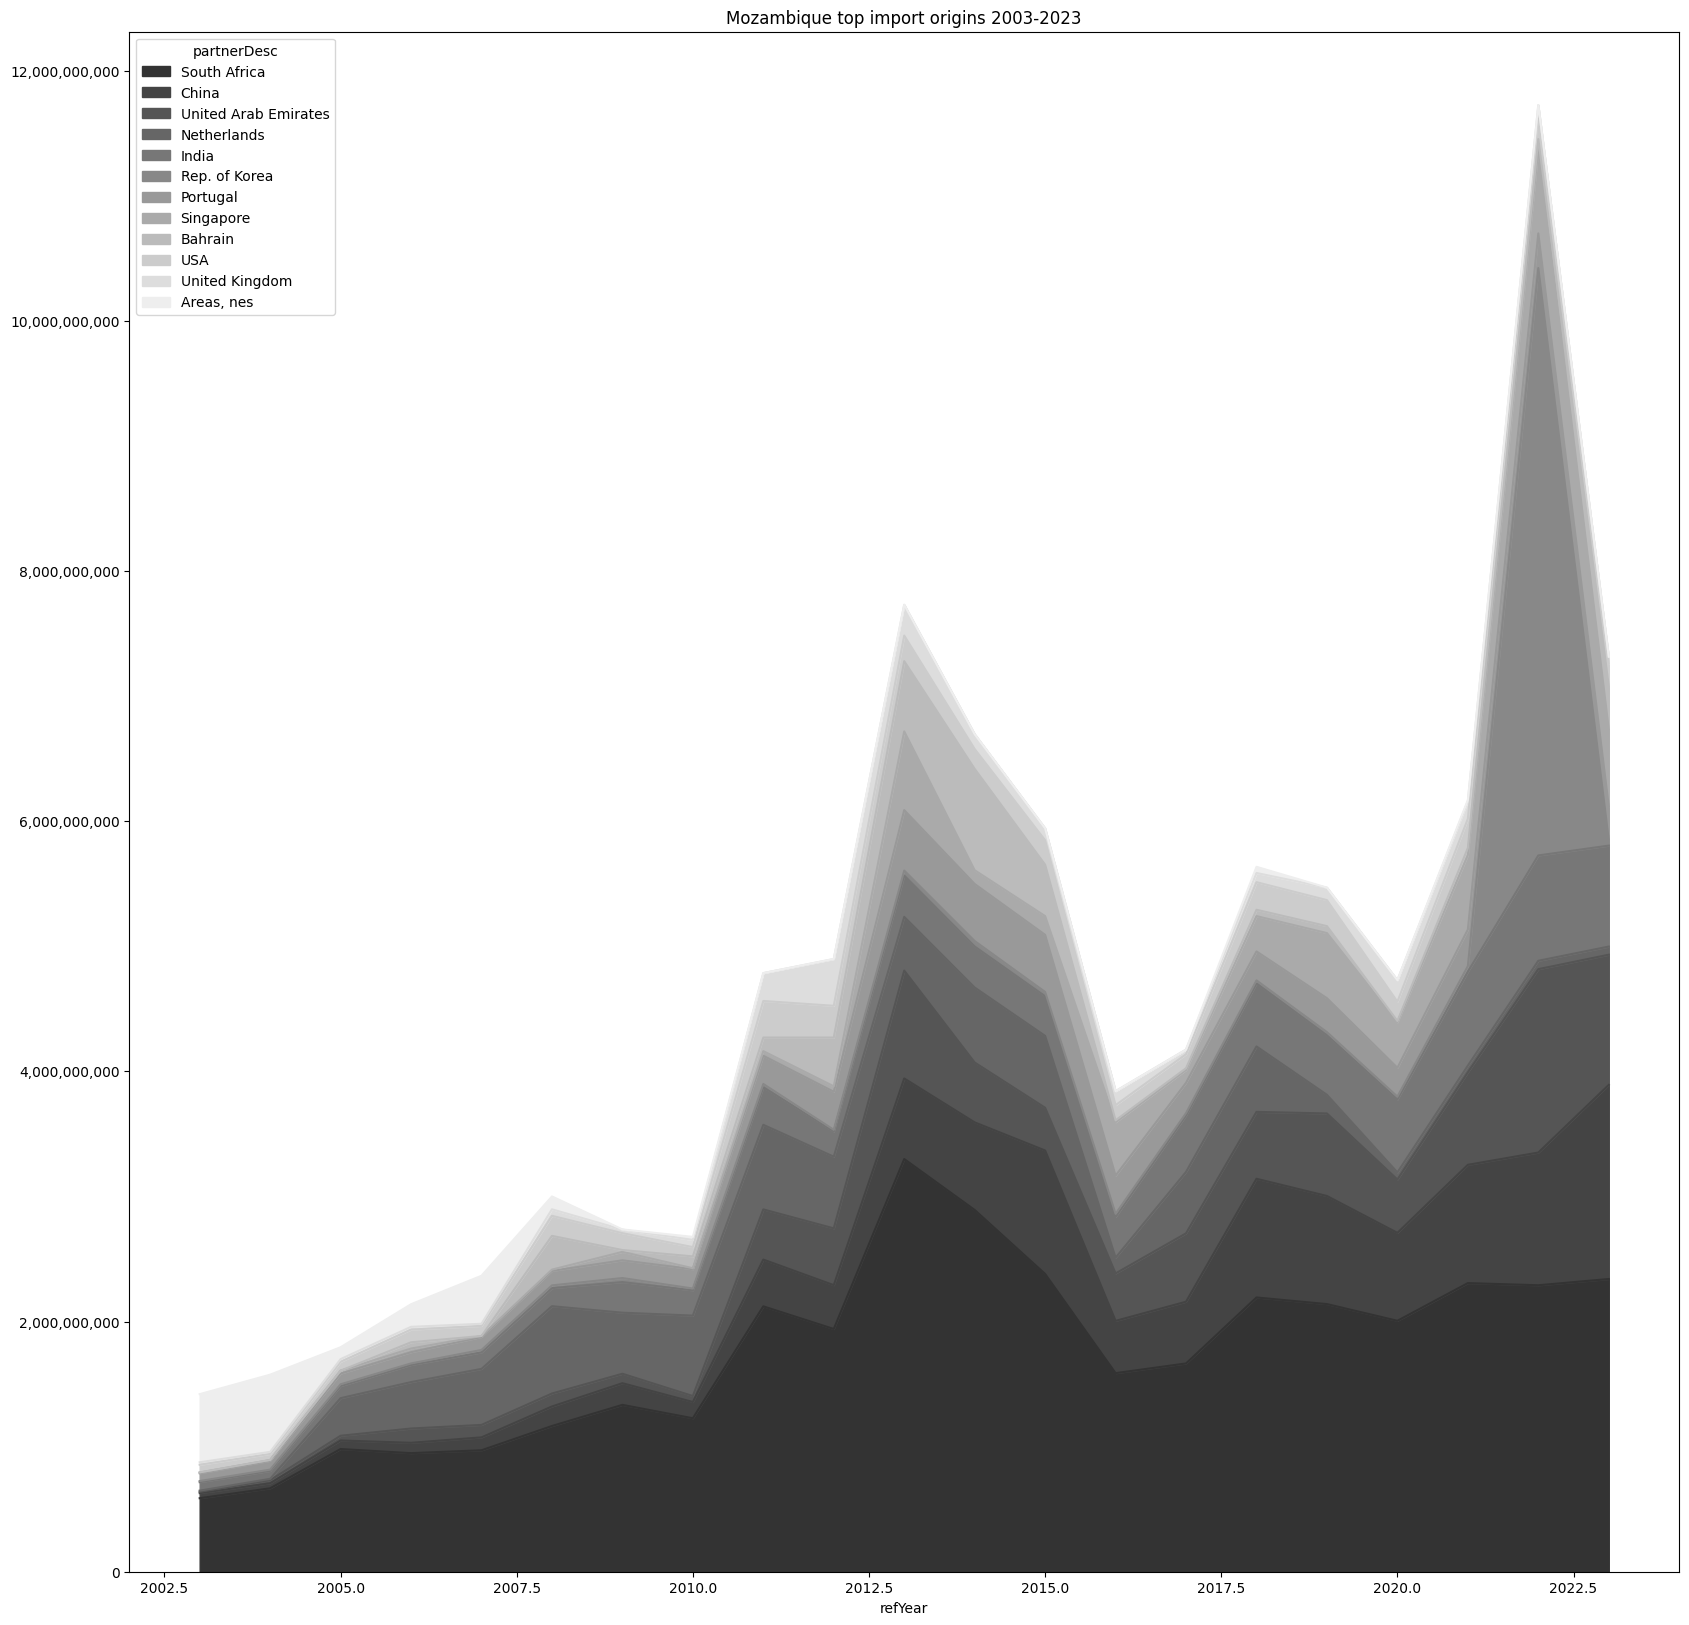

In [59]:
import matplotlib.pyplot as plt

title=f"{country_of_interest_name} top import origins {start_year}-{end_year}"
plotfile = f"reports/{country_of_interest_name}_3.1.4_import_partners_{start_year}-{end_year}.png"

# colors = ['red','lightsalmon','green','lightgreen','darkviolet','violet','blue','dodgerblue','orange','yellow','brown','black','grey','pink','cyan','magenta',]
# colors = ['crimson', 'darkorange', 'gold', 'limegreen', 'mediumseagreen', 'teal', 'deepskyblue', 'royalblue', 'indigo', 'mediumvioletred', 'hotpink', 'saddlebrown', 'grey', 'black', 'darkslategrey', 'darkkhaki']
colors = [ '#333333','#444444', '#555555', '#666666', '#777777', '#888888', '#999999', '#AAAAAA', '#BBBBBB', '#CCCCCC', '#DDDDDD', '#EEEEEE']
fig2 = values_only.plot.area(figsize=(20,20),title=title, color=colors)

for i, line in enumerate(fig2.get_lines()):
    n = i % len(colors)
    # print(i, line, colors[n])
    line.set_color(colors[n])

formatter = ticker.StrMethodFormatter('{x:,.0f}')
fig2.yaxis.set_major_formatter(formatter)

plt.savefig(plotfile)
plt.show()

In [60]:
plotfile

'reports/Mozambique_3.1.4_import_partners_2003-2023.png'

In [61]:
show_only_columns = [(l1, country) for l1,country in pivoted.columns.tolist() if country in top_import_partners]
list(show_only_columns)

[('partner_perc', 'Areas, nes'),
 ('partner_perc', 'Bahrain'),
 ('partner_perc', 'China'),
 ('partner_perc', 'India'),
 ('partner_perc', 'Netherlands'),
 ('partner_perc', 'Portugal'),
 ('partner_perc', 'Rep. of Korea'),
 ('partner_perc', 'Singapore'),
 ('partner_perc', 'South Africa'),
 ('partner_perc', 'USA'),
 ('partner_perc', 'United Arab Emirates'),
 ('partner_perc', 'United Kingdom'),
 ('primaryValue', 'Areas, nes'),
 ('primaryValue', 'Bahrain'),
 ('primaryValue', 'China'),
 ('primaryValue', 'India'),
 ('primaryValue', 'Netherlands'),
 ('primaryValue', 'Portugal'),
 ('primaryValue', 'Rep. of Korea'),
 ('primaryValue', 'Singapore'),
 ('primaryValue', 'South Africa'),
 ('primaryValue', 'USA'),
 ('primaryValue', 'United Arab Emirates'),
 ('primaryValue', 'United Kingdom')]

#### Export to Excel

Table with the top import origins for the period of interest

In [62]:
top_partners_file = f'reports/{country_of_interest_name}_3.1.1_top_import_partners.xlsx'
top_partners_cols_file = f'reports/{country_of_interest_name}_3.1.2_top_import_partners_cols.xlsx'
import_top_partners_file = f'reports/{country_of_interest_name}_3.1.3_import_top_{show_only_top}_partners_{start_year}-{end_year}.xlsx'

imports[cols].sort_values(['refYear','flowCode','partner_rank']).to_excel(top_partners_file)
pivoted.to_excel(top_partners_cols_file)
pivoted[show_only_columns].reset_index().to_excel(import_top_partners_file)

print(f"Top import partners file: {top_partners_file}")
print(f"Top import partners cols file: {top_partners_cols_file}")
print(f"Import top partners file: {import_top_partners_file}")

Top import partners file: reports/Mozambique_3.1.1_top_import_partners.xlsx
Top import partners cols file: reports/Mozambique_3.1.2_top_import_partners_cols.xlsx
Import top partners file: reports/Mozambique_3.1.3_import_top_5_partners_2003-2023.xlsx


### 3.2 Imports: products

#### Main imported products

In [63]:
import pandas as pd

# show 500 lines of dataframes
pd.set_option('display.max_rows', 500)

show_only_top=5
# years_of_interest = comtrade.year_range(2020, 2021)

print(country_of_interest_name, years_of_interest)


Mozambique 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023


Get the products imported by country of interest

In [64]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [65]:
import comtradetools

clCode = 'HS'
cmdDetail = 'AG6'  # AG2 aggregate two digits, top level, AG4 detail 4 digits, ... World bank uses AG6
df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1,
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51611), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51622), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.10

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628987 entries, 0 to 628986
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   typeCode                  628987 non-null  object 
 1   freqCode                  628987 non-null  object 
 2   refPeriodId               628987 non-null  int64  
 3   refYear                   628987 non-null  int64  
 4   refMonth                  628987 non-null  int64  
 5   period                    628987 non-null  object 
 6   reporterCode              628987 non-null  int64  
 7   reporterISO               628987 non-null  object 
 8   reporterDesc              628987 non-null  object 
 9   flowCode                  628987 non-null  object 
 10  flowDesc                  628987 non-null  object 
 11  partnerCode               628987 non-null  int64  
 12  partnerISO                628987 non-null  object 
 13  partnerDesc               628987 non-null  o

In [66]:
print("Years available in the data:", list(df.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [67]:
df.head()

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20030101,2003,52,2003,508,MOZ,Mozambique,M,...,903.00,False,NaN,False,"3,366.00",NaN,"3,366.00",0,True,False
1,C,A,20030101,2003,52,2003,508,MOZ,Mozambique,M,...,"20,226.00",False,NaN,False,"36,481.00",NaN,"36,481.00",0,True,False
2,C,A,20030101,2003,52,2003,508,MOZ,Mozambique,M,...,865.00,False,NaN,False,"1,366.00",NaN,"1,366.00",0,True,False
3,C,A,20030101,2003,52,2003,508,MOZ,Mozambique,M,...,"1,915.00",False,NaN,False,"5,322.00",NaN,"5,322.00",0,True,False
4,C,A,20030101,2003,52,2003,508,MOZ,Mozambique,M,...,360.00,False,NaN,False,923.00,NaN,923.00,0,True,False


Agreggate by product, keep the top products imported each year

In [68]:
import pandas as pd
import comtradetools
# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5
imports = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode'],'primaryValue','product',drop_duplicates=True)
imports = imports[imports['product_rank']<=show_only_top]
imports.info()

cols=['refYear','flowCode','product_rank','cmdCode', 'cmdDesc','product_sum','product_upper_perc','classificationCode','aggrLevel','isLeaf', 'product_upper_sum']
formats =  comtradetools.make_format(cols)

top_import_products_codes = imports['cmdCode'].unique()

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")
imports[cols].sort_values(['refYear','flowCode','product_rank']).head(10).style.format(formats)


<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 358 to 602923
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  105 non-null    object 
 1   freqCode                  105 non-null    object 
 2   refPeriodId               105 non-null    int64  
 3   refYear                   105 non-null    int64  
 4   refMonth                  105 non-null    int64  
 5   period                    105 non-null    object 
 6   reporterCode              105 non-null    int64  
 7   reporterISO               105 non-null    object 
 8   reporterDesc              105 non-null    object 
 9   flowCode                  105 non-null    object 
 10  flowDesc                  105 non-null    object 
 11  partnerCode               105 non-null    int64  
 12  partnerISO                105 non-null    object 
 13  partnerDesc               105 non-null    object 
 14  partner2Co

,refYear,flowCode,product_rank,cmdCode,cmdDesc,product_sum,product_upper_perc,classificationCode,aggrLevel,isLeaf,product_upper_sum
3796,2003,M,1,999999,Commodities not specified according to kind,"$676,827,784",19.305%,H2,6,True,"$3,505,994,890"
860,2003,M,2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$347,920,220",9.924%,H2,6,True,"$3,505,994,890"
358,2003,M,3,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed","$116,812,160",3.332%,H2,6,True,"$3,505,994,890"
603,2003,M,4,271600,Electrical energy,"$99,093,692",2.826%,H2,6,True,"$3,505,994,890"
859,2003,M,5,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$96,518,866",2.753%,H2,6,True,"$3,505,994,890"
26266,2004,M,1,999999,Commodities not specified according to kind,"$634,961,777",15.604%,H2,6,True,"$4,069,327,589"
23235,2004,M,2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$337,989,235",8.306%,H2,6,True,"$4,069,327,589"
22644,2004,M,3,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed","$165,047,582",4.056%,H2,6,True,"$4,069,327,589"
22994,2004,M,4,271600,Electrical energy,"$134,984,904",3.317%,H2,6,True,"$4,069,327,589"
23234,2004,M,5,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$134,020,889",3.293%,H2,6,True,"$4,069,327,589"


### Caveat

For Angola results match https://trendeconomy.com/data/h2/Angola/TOTAL for AG2 and AG4 but not https://www.statista.com/statistics/1143152/value-of-imports-into-angola-by-category/  and close but not same as https://globaledge.msu.edu/countries/angola/tradestats

The imports match World Bank Wits data mostly, but in some years 
there seems to be a mismatch of HS Codes, with different descriptions in Wits
and values that sometimes match AG4 and not AG6 (2015,total is AG4:2710 not AG6:271012 )
and in same cases match the first 5 digits (2015: 73042 "Casings tubing...", 2021 10011, Durum Wheat)

Use the following cell to compute totals for codes with first 5 digit in common to compare with other sources

In [69]:
import pandas as pd

pd.set_option('display.max_colwidth', 200)
pd.options.display.float_format = '{:,.2f}'.format

code_prefix = '10011'
cols=['refYear','flowCode','cmdCode','cmdDesc', 'classificationCode','aggrLevel','primaryValue','product_rank','product_perc']

# select rows and columns
selected_rows = df[(df['refYear']==2021) & (df['cmdCode'].str.startswith(code_prefix))][cols].sort_values(by=['primaryValue'],ascending=False).head(50)

# add total of primaryValue column
total = selected_rows['primaryValue'].sum()
selected_rows.loc['Total'] = pd.Series({'primaryValue': total})

# display selected rows
selected_rows


,refYear,flowCode,cmdCode,cmdDesc,classificationCode,aggrLevel,primaryValue,product_rank,product_perc
526940,"2,021.00",M,100111,"Cereals; wheat and meslin, durum wheat, seed",H5,6.00,"16,874.82","3,069.00",0.00
526941,"2,021.00",M,100111,"Cereals; wheat and meslin, durum wheat, seed",H5,6.00,"16,874.82","3,069.00",0.00
526942,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"2,774.90","3,678.00",0.00
526943,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,"1,989.80","3,678.00",0.00
526945,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,530.73,"3,678.00",0.00
526946,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,243.57,"3,678.00",0.00
526944,"2,021.00",M,100119,"Cereals; wheat and meslin, durum wheat, other than seed",H5,6.00,10.79,"3,678.00",0.00
Total,NaN,NaN,NaN,NaN,NaN,NaN,"39,299.45",NaN,NaN


In [70]:
print("Years available in the data:", list(imports.refYear.unique()))

Years available in the data: [2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


#### Export to Excel

In [71]:
filename = f'reports/{country_of_interest_name}_3.2_imports_products_{clCode}-{cmdDetail}-{imports["refYear"].min()}-{imports["refYear"].max()}.xlsx'
print("Exporting to ",filename)
imports[cols].sort_values(['refYear','flowCode','product_rank']).to_excel(filename,index=False)

Exporting to  reports/Mozambique_3.2_imports_products_HS-AG6-2003-2023.xlsx


### 3.3 Import partners / product analysis

Which are the partners selling the top imports by country of interest

In [72]:
# If symmetric_reporting is "True" we get the exports from
#    the reported imports of all the countries
# i.e. instead of asking Country of Interest for export data we ask the world
#    for import data from Country of Interest

symmetric_reporting = False  # set to false to use reported exports by Country of Interest

if symmetric_reporting:
    reporterCode = None
    partnerCode = country_of_interest
    flowCode = 'X'
    reporter_column = 'partner'
    partner_column = 'reporter'
else:
    reporterCode = country_of_interest
    partnerCode = None
    flowCode = 'M'
    reporter_column = 'reporter'
    partner_column = 'partner'

In [73]:
import warnings
warnings.filterwarnings('default')

clCode = 'HS'
cmdDetail = 'AG6'  # not all countries report at higher detail

df = comtradetools.getFinalData(
                        APIKEY,
                        reporterCode=reporterCode,
                        typeCode='C',  # commodities
                        freqCode='A',  # annual
                        flowCode=flowCode,
                        period=years_of_interest,
                        period_size=1, # lots of data, better segment
                        partnerCode=partnerCode,
                        remove_world=False,
                        partner2Code=0,
                        clCode=clCode,
                        cmdCode=cmdDetail,
                        motCode=0,  # all means of transport
                        customsCode='C00',
                        includeDesc=True,
                        retry_if_empty=False,
                        cache=True
                        )
df.info()

/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp], ignore_index=True)
/Users/jrc/develop/cipf-comtrade/comtradetools.py:652: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude emp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628987 entries, 0 to 628986
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   typeCode                  628987 non-null  object 
 1   freqCode                  628987 non-null  object 
 2   refPeriodId               628987 non-null  int64  
 3   refYear                   628987 non-null  int64  
 4   refMonth                  628987 non-null  int64  
 5   period                    628987 non-null  object 
 6   reporterCode              628987 non-null  int64  
 7   reporterISO               628987 non-null  object 
 8   reporterDesc              628987 non-null  object 
 9   flowCode                  628987 non-null  object 
 10  flowDesc                  628987 non-null  object 
 11  partnerCode               628987 non-null  int64  
 12  partnerISO                628987 non-null  object 
 13  partnerDesc               628987 non-null  o

In [74]:
cols2=['refYear','flowCode','reporterDesc','partnerDesc','primaryValue','cmdCode','cmdDesc']
df[cols2].sample(10)

,refYear,flowCode,reporterDesc,partnerDesc,primaryValue,cmdCode,cmdDesc
158982,2009,M,Mozambique,Germany,925.00,870880,"Vehicles; parts, suspension shock-absorbers"
206851,2011,M,Mozambique,China,"36,000.00",901819,"Medical, surgical instruments and appliances; electro-diagnostic apparatus (including apparatus for functional exploratory examination or for checking physiological parameters), n.e.s. in item no...."
200476,2011,M,Mozambique,World,"18,000.00",090420,"Spices; fruits of the genus capsicum or pimenta, dried or crushed or ground"
261016,2013,M,Mozambique,"China, Hong Kong SAR","26,950.00",850780,"Electric accumulators; n.e.c. in heading no. 8507, including separators, whether or not rectangular (including square)"
4141,2003,M,Mozambique,Belgium,888.00,853669,"Electrical apparatus; plugs and sockets, for a voltage not exceeding 1000 volts"
579816,2022,M,Mozambique,China,131.24,701590,"Glasses; clock or watch and similar, glasses for non-corrective spectacles, curved, bent, hollowed etc, (not optically worked), hollow glass spheres and segments, for the manufacture of such glasses"
546244,2021,M,Mozambique,World,"1,057,870.18",820190,"Tools, hand; forks, scythes, sickles, hay knives, timber wedges, and other hand tools of a kind used in agriculture, horticulture or forestry n.e.c. in heading 8201"
286431,2014,M,Mozambique,World,"3,940.00",900510,Binoculars
82077,2006,M,Mozambique,Italy,"12,087.00",940180,"Seats; n.e.s. in heading no. 9401, (excluding medical, surgical, dental, veterinary or barber furniture)"
481910,2019,M,Mozambique,France,"3,020.52",851190,"Ignition or starting equipment; parts of the equipment of heading no. 8511, for use in spark-ignition or compression-ignition internal combustion engines"


In [75]:
df.refYear.unique()

array([2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

Aggregate by partner and keep the main ones

In [76]:
import pandas as pd
import comtradetools
import warnings

# show 500 lines
pd.options.display.max_rows=500
pd.options.display.float_format='{:,.2f}'.format

show_only_top = 5   # change to have more top partners

print(f"Top products imported by {country_of_interest_name} in {years_of_interest}:\n {top_import_products_codes}")
for cmdCode in top_import_products_codes:
    print(f"   {cmdCode}: {comtradetools.HS_CODES.get(cmdCode,cmdCode)}")

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='cmd_partner'
# remove world
if 0 in df[f'{partner_column}Code'].unique():
    warnings.warn("Removing world from data")
    df = df[df[f'{partner_column}Code']!=0]

products_and_partners = comtradetools.total_rank_perc(df,['refYear','flowCode','cmdCode',f'{partner_column}Code'],'primaryValue',prefix,drop_duplicates=True)
cols=['refYear','flowCode','cmdDesc','cmdCode',f'{partner_column}Desc',f'{prefix}_rank',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats=comtradetools.make_format(cols)

products_and_partners=products_and_partners[(products_and_partners['cmdCode'].isin(top_import_products_codes)
                        & (products_and_partners[f'{prefix}_rank']<=show_only_top))]
print(f"Data available for years {products_and_partners.refYear.unique()}")


Top products imported by Mozambique in 2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023:
 ['100630' '271600' '271011' '271019' '999999' '100190' '870421' '760110'
 '760410' '271113' '902710' '300490' '890200' '282612' '271012' '890690'
 '100199' '151110' '890590']
   100630: Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed
   271600: Electrical energy
   271011: 271011
   271019: Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations
   999999: Commodities not specified according to kind
   100190: 100190
   870421: Vehicles; with only compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), n.e.c. in item no 8704.1
   760110: Aluminium; u

/var/folders/x7/qzytnd752559g0w475rfwkx00000gn/T/ipykernel_68743/890561552.py:19: UserWarning: Removing world from data
  warnings.warn("Removing world from data")


Data available for years [2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023]


### Partners for main import products

In [77]:
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True])\
                                            .head(30).style.format(formats) #.hide(axis='index')

,refYear,flowCode,cmdDesc,cmdCode,partnerDesc,cmd_partner_rank,cmd_partner_sum,cmd_partner_perc,cmd_partner_upper_sum
22328,2003,M,Commodities not specified according to kind,999999,"Areas, nes",1,"$337,138,272",99.623%,"$338,413,892"
4068,2003,M,Commodities not specified according to kind,999999,Argentina,2,"$684,571",0.202%,"$338,413,892"
17507,2003,M,Commodities not specified according to kind,999999,South Africa,3,"$191,377",0.057%,"$338,413,892"
8090,2003,M,Commodities not specified according to kind,999999,Indonesia,4,"$94,890",0.028%,"$338,413,892"
8855,2003,M,Commodities not specified according to kind,999999,Italy,5,"$79,184",0.023%,"$338,413,892"
22066,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,"Areas, nes",1,"$119,046,400",68.433%,"$173,960,111"
14632,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,South Africa,2,"$34,642,461",19.914%,"$173,960,111"
13187,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Saudi Arabia,3,"$16,837,405",9.679%,"$173,960,111"
19202,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Switzerland,4,"$1,444,576",0.830%,"$173,960,111"
11472,2003,M,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",271019,Portugal,5,"$1,143,399",0.657%,"$173,960,111"


In [78]:
filename = f'reports/{country_of_interest_name}_3.3_imports_products_partners_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'
print("Exporting to ",filename)
products_and_partners[cols].sort_values(['refYear','flowCode',f'{prefix}_upper_sum',f'{prefix}_rank'],
                                        ascending=[True,True,False,True]).to_excel(filename, index=False)

Exporting to  reports/Mozambique_3.3_imports_products_partners_HS-AG6-2003-2023.xlsx


### 3.4 Main partners and main products imported by country of interest

Detail of the main products by import partner.

Allows to analyse the mix of products of the main suppliers from this country.



In [79]:
top_import_partners

array(['Portugal', 'India', 'South Africa', 'USA', 'Areas, nes',
       'Netherlands', 'United Arab Emirates', 'Bahrain', 'China',
       'United Kingdom', 'Singapore', 'Rep. of Korea'], dtype=object)

In [80]:
import comtradetools

show_only_top = 5  # for suppliers with wide range of products e.g PT->AO increase

print(f"Top import partners ({len(top_import_partners)}): {top_import_partners}")
prefix='partner_cmd'
suppliers_and_products = comtradetools.total_rank_perc(df,['refYear','flowCode',f'{partner_column}Code','cmdCode'],'primaryValue',prefix,drop_duplicates=False)

cols=['refYear','flowCode',f'{partner_column}Desc',f'{prefix}_rank','cmdCode','cmdDesc',f'{prefix}_sum',f'{prefix}_perc',f'{prefix}_upper_sum']
formats = comtradetools.make_format(cols)
suppliers_and_products=suppliers_and_products[(suppliers_and_products[f'{partner_column}Desc'].isin(top_import_partners)
                       & (suppliers_and_products[f'{prefix}_rank']<=show_only_top))]

print("First rows")
suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).head(10).style.format(formats).hide(axis='index')

Top import partners (12): ['Portugal' 'India' 'South Africa' 'USA' 'Areas, nes' 'Netherlands'
 'United Arab Emirates' 'Bahrain' 'China' 'United Kingdom' 'Singapore'
 'Rep. of Korea']
First rows


refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2003,M,South Africa,1,271600,Electrical energy,"$49,542,952",8.430%,"$587,719,943"
2003,M,South Africa,2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$34,642,461",5.894%,"$587,719,943"
2003,M,South Africa,3,870421,"Vehicles; compression-ignition internal combustion piston engine (diesel or semi-diesel), for transport of goods, (of a gvw not exceeding 5 tonnes), nes in item no 8704.1","$28,225,372",4.803%,"$587,719,943"
2003,M,South Africa,4,320890,"Paints and varnishes; based on polymers n.e.s. in heading no. 3208, dispersed or dissolved in a non-aqueous medium","$25,176,672",4.284%,"$587,719,943"
2003,M,South Africa,5,851730,Line telephony or telegraphy apparatus; telephonic or telegraphic switching apparatus,"$16,578,210",2.821%,"$587,719,943"
2003,M,"Areas, nes",1,999999,Commodities not specified according to kind,"$337,138,272",61.906%,"$544,601,275"
2003,M,"Areas, nes",2,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations","$119,046,400",21.859%,"$544,601,275"
2003,M,"Areas, nes",3,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations","$45,197,016",8.299%,"$544,601,275"
2003,M,"Areas, nes",4,030613,"Crustaceans; shrimps and prawns, frozen (whether in shell or not, whether or not cooked by steaming or by boiling in water)","$16,426,326",3.016%,"$544,601,275"
2003,M,"Areas, nes",5,847431,Machines; concrete or mortar mixers,"$6,281,957",1.153%,"$544,601,275"


Last rows

In [81]:

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).tail(10).style.format(formats).hide(axis='index')

refYear,flowCode,partnerDesc,partner_cmd_rank,cmdCode,cmdDesc,partner_cmd_sum,partner_cmd_perc,partner_cmd_upper_sum
2023,M,Rep. of Korea,1,842952,"Mechanical shovels, excavators and shovel loaders; with a 360 degree revolving super structure","$4,750,000",10.347%,"$45,909,000"
2023,M,Rep. of Korea,2,382219,"Reagents; diagnostic or laboratory reagents on a backing, prepared diagnostic or laboratory reagents whether or not on a backing, whether or not put up in the form of kits; n.e.c.in item 3822.1","$4,522,000",9.850%,"$45,909,000"
2023,M,Rep. of Korea,3,382211,"Reagents; diagnostic or laboratory reagents on a backing, prepared diagnostic or laboratory reagents whether or not on a backing, whether or not put up in the form of kits; for malaria","$4,084,000",8.896%,"$45,909,000"
2023,M,Rep. of Korea,4,390210,"Propylene, other olefin polymers; polypropylene in primary forms","$2,934,000",6.391%,"$45,909,000"
2023,M,Rep. of Korea,5,390230,"Propylene, other olefin polymers; propylene copolymers in primary forms","$2,662,000",5.798%,"$45,909,000"
2023,M,"Areas, nes",1,761410,"Aluminium; stranded wire, cables, plaited bands and the like, (not electrically insulated), with steel core","$210,000",50.602%,"$415,000"
2023,M,"Areas, nes",2,870323,"Vehicles; with only spark-ignition internal combustion reciprocating piston engine, cylinder capacity over 1500 but not over 3000cc","$126,000",30.361%,"$415,000"
2023,M,"Areas, nes",3,842952,"Mechanical shovels, excavators and shovel loaders; with a 360 degree revolving super structure","$28,000",6.747%,"$415,000"
2023,M,"Areas, nes",4,720810,"Iron or non-alloy steel; in coils, flat-rolled, of a width 600mm or more, hot-rolled, with patterns in relief","$25,000",6.024%,"$415,000"
2023,M,"Areas, nes",5,870322,"Vehicles; with only spark-ignition internal combustion piston engine, cylinder capacity over 1000 but not over 1500cc","$12,000",2.892%,"$415,000"


#### Export to Excel

In [82]:
filename = f'reports/{country_of_interest_name}_3.4_imports_partners_products_{clCode}-{cmdDetail}-{products_and_partners["refYear"].min()}-{products_and_partners["refYear"].max()}.xlsx'

suppliers_and_products[suppliers_and_products[f'{prefix}_rank']<=show_only_top][cols].sort_values(
    ['refYear','flowCode','partner_cmd_upper_sum',f'{prefix}_sum',f'{prefix}_rank'],
    ascending=[True,True,False,False,False]).to_excel(filename, index=False)

print("Exporting to ",filename)

Exporting to  reports/Mozambique_3.4_imports_partners_products_HS-AG6-2003-2023.xlsx


### 3.5 Get the alternative clients for country of interest suppliers

For each year, supplier, imported commodity, fetch all the 
exports of the commodity by the supplier to other countries, and
compute the ranking of country of interest among the clients
of partner for that commodity.

Country of interest: Angola, in 2022 Argentina was #1 supplier of Angola for commodity
code 100119 "Cereals; wheat and meslin, durum wheat, other than seed"; fetch all the clients of Argentina for 100119 and compute the ranking of Angola.

First step is to get the combos os partner and commodity.



In [83]:
top_import_products_codes

array(['100630', '271600', '271011', '271019', '999999', '100190',
       '870421', '760110', '760410', '271113', '902710', '300490',
       '890200', '282612', '271012', '890690', '100199', '151110',
       '890590'], dtype=object)

In [84]:
combos_of_interest = suppliers_and_products[(suppliers_and_products['cmdCode'].isin(top_import_products_codes)
                & (suppliers_and_products[f'{partner_column}Code'].isin(top_import_partners_codes)))][[f'{partner_column}Code','cmdCode']].drop_duplicates()
combos_of_interest = [tuple(x) for x in combos_of_interest.values]
len(combos_of_interest)

83

In [85]:
# create lists of commodities codes and country codes to query comtrade
cmdCode_list = [cmdCode for (countryCode,cmdCode) in combos_of_interest]
cmdCode_list = list(set(cmdCode_list))
countryCode_list = [countryCode for (countryCode,cmdCode) in combos_of_interest]
countryCode_list = list(set(countryCode_list))
cmdCodeCSV = ','.join(cmdCode_list)
countryCodeCSV = ','.join(map(str,countryCode_list))

Get the all clients of suppliers for the products imported by country of interest

In [86]:
print("Years of interest: ", years_of_interest)
print("countryCodeCSV: ", countryCodeCSV)
print("cmdCodeCSV: ", cmdCodeCSV)

df = comtradetools.getFinalData(APIKEY,
                                typeCode='C',  # commodities
                                freqCode='A',  # annual
                                flowCode='X',
                                reporterCode=countryCodeCSV,
                                partnerCode=None,
                                remove_world=True,
                                partner2Code=0,
                                period=years_of_interest,
                                period_size=1,
                                clCode=clCode,
                                cmdCode=cmdCodeCSV,  # Top level product types
                                motCode=0,  # all means of transport
                                customsCode='C00',
                                includeDesc=True,
                                retry_if_empty=False,
                                cache=True,

                                )

Years of interest:  2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
countryCodeCSV:  899,710,842,620,826,784,528,48,410,699,156,702
cmdCodeCSV:  999999,151110,282612,760110,271019,271011,760410,300490,870421,100199,890590,271113,271012,890200,271600,100630,100190,902710


/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51978), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.101.29', 51980), raddr=('20.101.83.117', 443)>
  return getPreviewData(subscription_key, 'FINAL', typeCode, freqCode, clCode, period, reporterCode,
/Users/jrc/develop/cipf-comtrade/venv/lib/python3.10/site-packages/comtradeapicall/PreviewGet.py:137: ResourceWarning: unclosed <ssl.SSLSocket fd=88, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('192.168.10

Countries also buying top imports of country of interest from the same suppliers

In [87]:
list(df.reporterDesc.unique()), list(df.partnerDesc.unique())


(['Bahrain',
  'China',
  'Rep. of Korea',
  'Portugal',
  'Netherlands',
  'South Africa',
  'Singapore',
  'India',
  'United Arab Emirates',
  'United Kingdom',
  'USA'],
 ['Algeria',
  'Australia',
  'Austria',
  'Ghana',
  'Belgium',
  'Bosnia Herzegovina',
  'Canada',
  'China',
  'France',
  'Germany',
  'Japan',
  'Greece',
  'Indonesia',
  'Iran',
  'Iraq',
  'Italy',
  'China, Hong Kong SAR',
  'Jordan',
  'Kenya',
  'Rep. of Korea',
  'Kuwait',
  'Lebanon',
  'Malaysia',
  'Other Asia, nes',
  'Morocco',
  'Liberia',
  'Libya',
  'Oman',
  'Netherlands',
  'New Zealand',
  'Nigeria',
  'Philippines',
  'Portugal',
  'Qatar',
  'Norway',
  'Pakistan',
  'Saudi Arabia',
  'Russian Federation',
  'Sudan (...2011)',
  'India',
  'Viet Nam',
  'South Africa',
  'Spain',
  'Sweden',
  'Switzerland',
  'Syria',
  'Thailand',
  'United Arab Emirates',
  'Tunisia',
  'Türkiye',
  'Egypt',
  'United Kingdom',
  'Bunkers',
  'Yemen',
  'Areas, nes',
  'Angola',
  'Argentina',
  'Bangla

### Ranking of country of interest in the costumers of main suppliers
Allows assessment of the importance of country of interest for the partners
that are selling its main imports.

It allows for restricting rank, avoiding irrelevant matchess

For each supplier show the top costumers of the products bought by country of interest. 

If country of interest is not in the top five constumers, show position anyway if it is a supplier in the given year 

In [88]:
import pandas as pd
import comtradetools

#  set max rows to 500
pd.set_option('display.max_rows', 1500)


other_costumers = comtradetools.total_rank_perc(
                                        df,
                                        groupby=['refYear','flowCode','reporterCode','cmdCode','partnerCode'],
                                        col='primaryValue',
                                        prefix='cmd_partner',
                                        )

other_costumers = other_costumers[other_costumers[['reporterCode','cmdCode']].apply(tuple,axis=1).isin(combos_of_interest)]
cols=['reporterDesc','cmdCode','cmdDesc','refYear','partnerDesc','cmd_partner_rank','primaryValue','cmd_partner_perc','cmd_partner_upper_sum']
formats =  comtradetools.make_format(cols)

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).head(20).style.format(formats).hide(axis="index")

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2003,"Areas, nes",1,"$4,680,045,329",99.998%,"$4,680,159,093"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2003,India,2,"$90,128",0.002%,"$4,680,159,093"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2003,Qatar,3,"$19,620",0.000%,"$4,680,159,093"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2003,Greece,4,"$4,016",0.000%,"$4,680,159,093"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2004,"Areas, nes",1,"$5,551,320,461",99.999%,"$5,551,360,833"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2004,India,2,"$40,372",0.001%,"$5,551,360,833"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2005,"Areas, nes",1,"$7,783,497,562",100.000%,"$7,783,534,688"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2005,United Arab Emirates,2,"$20,758",0.000%,"$7,783,534,688"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2005,Qatar,3,"$6,862",0.000%,"$7,783,534,688"
Bahrain,271011,"Petroleum oils and oils from bituminous minerals, not crude or waste oils; preparations n.e.c. with 70% or more (weight),of petroleum oils or oils from bituminous minerals; being the basic constituents of the preparations: light oils and preparations",2005,India,4,"$5,213",0.000%,"$7,783,534,688"


In [89]:
ignore_if_rank_is_higher = 25

relevant_for_partner_exports=other_costumers[
    (other_costumers['partnerCode'] == country_of_interest) &
    (other_costumers['cmd_partner_rank'] < ignore_if_rank_is_higher)
][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank'])
relevant_for_partner_exports.head(10).style.format(formats).hide(axis='index')

reporterDesc,cmdCode,cmdDesc,refYear,partnerDesc,cmd_partner_rank,primaryValue,cmd_partner_perc,cmd_partner_upper_sum
Bahrain,271012,"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; light oils and preparations",2014,Mozambique,5,"$536,501,494",6.251%,"$8,582,790,943"
Bahrain,271019,"Oils; petroleum oils and oils obtained from bituminous minerals, not crude; preparations n.e.c., containing by weight 70% or more of petroleum oils or oils obtained from bituminous minerals, (excluding waste oils), other than light oils and preparations",2011,Mozambique,2,"$7,074,392",24.589%,"$28,770,532"
Bahrain,271019,"Petroleum oils and oils from bituminous minerals, not containing biodiesel, not crude, not waste oils; preparations n.e.c, containing by weight 70% or more of petroleum oils or oils from bituminous minerals; not light oils and preparations",2013,Mozambique,5,"$3,578,436",0.958%,"$373,402,422"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2006,Mozambique,19,"$2,702,746",0.792%,"$341,157,324"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2007,Mozambique,15,"$3,369,501",0.877%,"$384,351,798"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2009,Mozambique,23,"$1,665,849",0.458%,"$363,459,824"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2016,Mozambique,8,"$8,008,733",4.549%,"$176,047,388"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2017,Mozambique,3,"$24,228,629",5.780%,"$419,181,558"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2019,Mozambique,19,"$11,686,893",1.333%,"$876,542,719"
China,100630,"Cereals; rice, semi-milled or wholly milled, whether or not polished or glazed",2020,Mozambique,17,"$14,076,101",2.120%,"$663,949,349"


#### Export to Excel


In [90]:
filename = filename = f'reports/{country_of_interest_name}_3.5.1_import_partners_alternative.xlsx'

other_costumers[(other_costumers['partnerCode'] == country_of_interest)
                | (other_costumers['cmd_partner_rank']<=show_only_top)
                ][cols].sort_values(by=['reporterDesc','cmdCode','refYear','cmd_partner_rank']).to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Mozambique_3.5.1_import_partners_alternative.xlsx


In [91]:
filename = f'reports/{country_of_interest_name}_3.5.2_import_partners_alternative_relevant.xlsx'

relevant_for_partner_exports.to_excel(filename, index=False)
print("Exporting to ",filename)

Exporting to  reports/Mozambique_3.5.2_import_partners_alternative_relevant.xlsx


In [92]:
from datetime import datetime

current_datetime = datetime.now()
print(f"Note run for {country_of_interest_name}:", current_datetime)

Note run for Mozambique: 2024-06-18 08:38:10.650988
